In [28]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import mplleaflet

In [29]:
plz_shape_df = gpd.read_file('/home/col-gku/Desktop/Ooen street map/plz-gebiete.shp', dtype={'plz': str})

In [30]:
plz_shape_df.head()

plz                         note  \
0  52538      52538 Gangelt, Selfkant   
1  47559             47559 Kranenburg   
2  52525  52525 Waldfeucht, Heinsberg   
3  52074                 52074 Aachen   
4  52531       52531 Ãbach-Palenberg   

                                            geometry  
0  POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...  
1  POLYGON ((5.94504 51.82354, 5.94580 51.82409, ...  
2  POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...  
3  POLYGON ((5.97486 50.79804, 5.97495 50.79809, ...  
4  POLYGON ((6.01507 50.94788, 6.03854 50.93561, ...

In [31]:
plt.rcParams['figure.figsize'] = [16, 11]

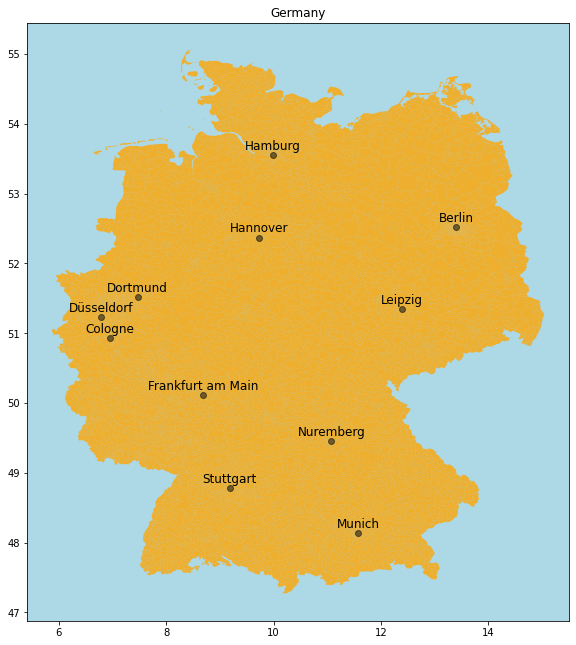

In [32]:
top_cities = {
    'Berlin': (13.404954, 52.520008), 
    'Cologne': (6.953101, 50.935173),
    'Düsseldorf': (6.782048, 51.227144),
    'Frankfurt am Main': (8.682127, 50.110924),
    'Hamburg': (9.993682, 53.551086),
    'Leipzig': (12.387772, 51.343479),
    'Munich': (11.576124, 48.137154),
    'Dortmund': (7.468554, 51.513400),
    'Stuttgart': (9.181332, 48.777128),
    'Nuremberg': (11.077438, 49.449820),
    'Hannover': (9.73322, 52.37052)
}
fig, ax = plt.subplots()
plz_shape_df.plot(ax=ax, color='orange', alpha=0.8)
# Plot cities. 
for c in top_cities.keys():
    # Plot city name.
    ax.text(
        x=top_cities[c][0], 
        # Add small shift to avoid overlap with point.
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )
    # Plot city location centroid.
    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany', 
    aspect=1.3, 
    facecolor='lightblue'
);

# First-Digit-Postalcodes Areas

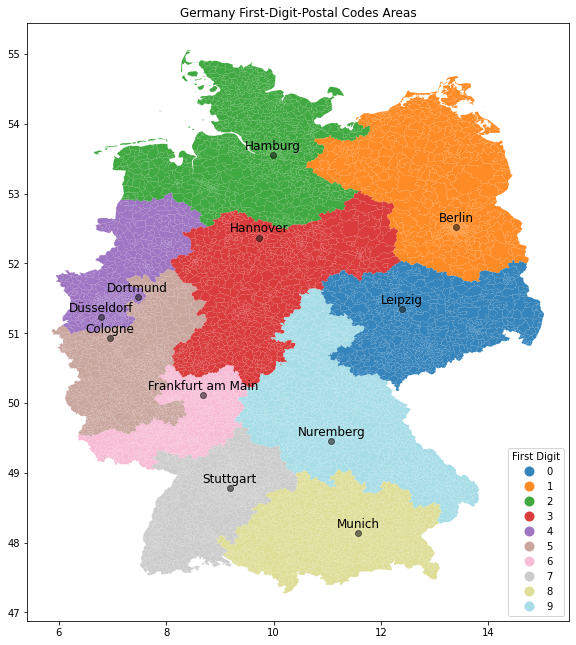

In [33]:
# Create feature.
plz_shape_df = plz_shape_df \
    .assign(first_dig_plz = lambda x: x['plz'].str.slice(start=0, stop=1))

fig, ax = plt.subplots()

plz_shape_df.plot(
    ax=ax, 
    column='first_dig_plz', 
    categorical=True, 
    legend=True, 
    legend_kwds={'title':'First Digit', 'loc':'lower right'},
    cmap='tab20',
    alpha=0.9
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany First-Digit-Postal Codes Areas', 
    aspect=1.3,
    facecolor='white'
);

# Bundesland Map

In [34]:
plz_region_df = pd.read_csv(
    '/home/col-gku/Desktop/Ooen street map/zuordnung_plz_ort.csv', 
    sep=',', 
    dtype={'plz': str}
)

In [35]:
plz_region_df.drop('osm_id', axis=1, inplace=True)

In [36]:
plz_region_df.head()

ort    plz           bundesland
0    Aach  78267    Baden-Württemberg
1    Aach  54298      Rheinland-Pfalz
2  Aachen  52062  Nordrhein-Westfalen
3  Aachen  52064  Nordrhein-Westfalen
4  Aachen  52066  Nordrhein-Westfalen

In [37]:
# Merge data.
germany_df = pd.merge(
    left=plz_shape_df, 
    right=plz_region_df, 
    on='plz',
    how='inner'
)

germany_df.drop(['note'], axis=1, inplace=True)

In [38]:
germany_df.head()

plz                                           geometry first_dig_plz  \
0  52538  POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...             5   
1  52538  POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...             5   
2  47559  POLYGON ((5.94504 51.82354, 5.94580 51.82409, ...             4   
3  52525  POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...             5   
4  52525  POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...             5   

          ort           bundesland  
0     Gangelt  Nordrhein-Westfalen  
1    Selfkant  Nordrhein-Westfalen  
2  Kranenburg  Nordrhein-Westfalen  
3   Heinsberg  Nordrhein-Westfalen  
4  Waldfeucht  Nordrhein-Westfalen

In [39]:
germany_df.ort.value_counts()

Berlin               198
Hamburg              109
München               76
Köln                  49
Frankfurt am Main     42
                    ... 
Nienstädt              1
Gedern                 1
Wester-Ohrstedt        1
Oster-Ohrstedt         1
Soltau                 1
Name: ort, Length: 10256, dtype: int64

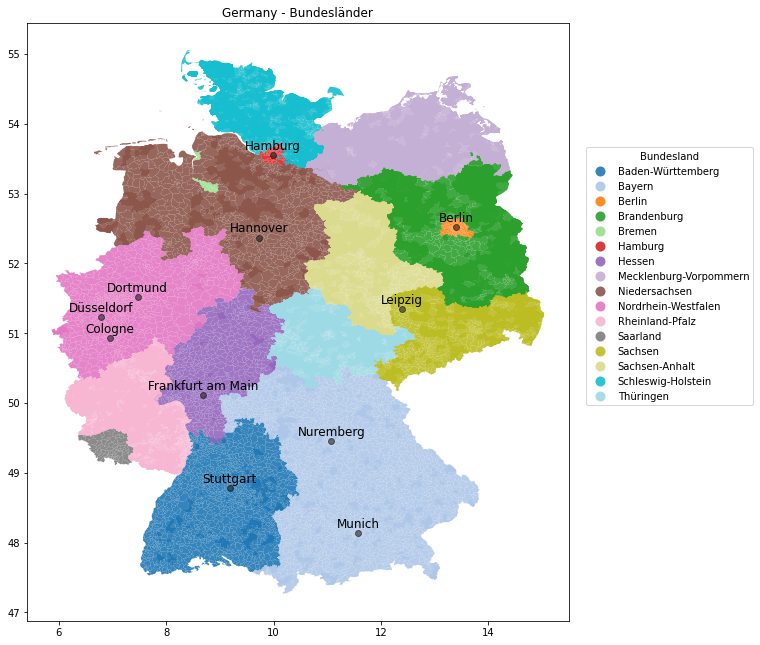

In [40]:
fig, ax = plt.subplots()

germany_df.plot(
    ax=ax, 
    column='bundesland', 
    categorical=True, 
    legend=True, 
    legend_kwds={'title':'Bundesland', 'bbox_to_anchor': (1.35, 0.8)},
    cmap='tab20',
    alpha=0.9
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany - Bundesländer', 
    aspect=1.3, 
    facecolor='white'
);

# Number of Inhabitants

In [41]:
plz_einwohner_df = pd.read_csv(
    '/home/col-gku/Desktop/Ooen street map/plz_einwohner.csv', 
    sep=',', 
    dtype={'plz': str, 'einwohner': int}
)

plz_einwohner_df.head()

plz  einwohner
0  01067      11957
1  01069      25491
2  01097      14821
3  01099      28018
4  01108       5876

In [42]:
# Merge data.
germany_df = pd.merge(
    left=germany_df, 
    right=plz_einwohner_df, 
    on='plz',
    how='left'
)


In [43]:
germany_df.head()

plz                                           geometry first_dig_plz  \
0  52538  POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...             5   
1  52538  POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...             5   
2  47559  POLYGON ((5.94504 51.82354, 5.94580 51.82409, ...             4   
3  52525  POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...             5   
4  52525  POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...             5   

          ort           bundesland  einwohner  
0     Gangelt  Nordrhein-Westfalen      21390  
1    Selfkant  Nordrhein-Westfalen      21390  
2  Kranenburg  Nordrhein-Westfalen      10220  
3   Heinsberg  Nordrhein-Westfalen      49737  
4  Waldfeucht  Nordrhein-Westfalen      49737

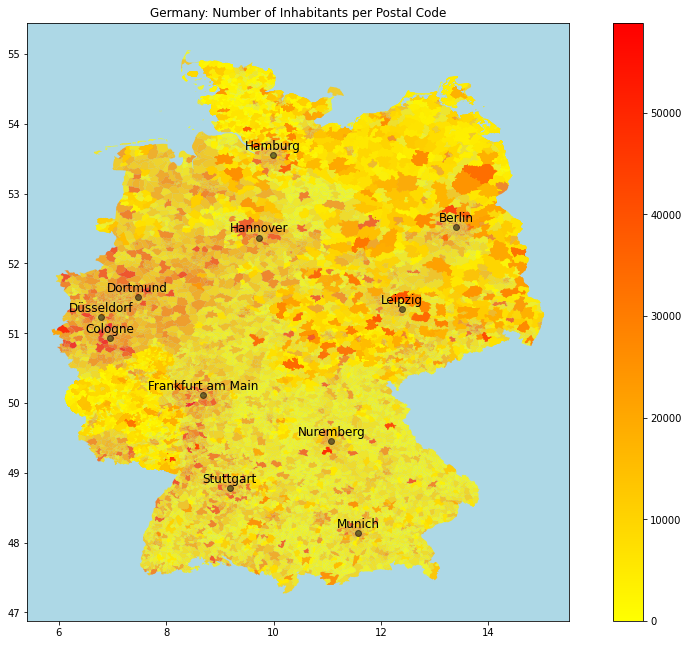

In [44]:
fig, ax = plt.subplots()

germany_df.plot(
    ax=ax, 
    column='einwohner', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.8
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Number of Inhabitants per Postal Code', 
    aspect=1.3, 
    facecolor='lightblue'
);

In [45]:
df =pd.read_pickle("stats.pickle")

In [46]:
df.head()

evse_id          datetime_start           datetime_stop  \
0  hj_AT*HTB*E100011 2019-02-10 10:28:53.836 2019-02-10 12:54:11.750   
1  hj_AT*HTB*E100011 2019-02-15 08:33:09.428 2019-02-15 12:37:18.549   
2  hj_AT*HTB*E100011 2019-02-19 14:12:56.548 2019-02-19 18:55:34.738   
3  hj_AT*HTB*E100011 2019-02-23 09:05:08.119 2019-02-23 14:41:49.291   
4  hj_AT*HTB*E100011 2019-02-25 11:32:44.019 2019-02-25 12:27:19.368   

       city           park_id  latitude  longitude  postal_code  year  \
0  Rimsting  hj_AT*HTB*E10001   47.8772    12.3372        83253  2019   
1  Rimsting  hj_AT*HTB*E10001   47.8772    12.3372        83253  2019   
2  Rimsting  hj_AT*HTB*E10001   47.8772    12.3372        83253  2019   
3  Rimsting  hj_AT*HTB*E10001   47.8772    12.3372        83253  2019   
4  Rimsting  hj_AT*HTB*E10001   47.8772    12.3372        83253  2019   

      month  day day_of_week_name_Start  Temperature  Precipitation  \
0  February   10                 Sunday     5.133333            0.0   
1  February   15                 Friday    -2.233333            0.0   
2  February   19                Tuesday    12.133333            0.0   
3  February   23               Saturday    -1.133333            0.0   
4  February   25                 Monday     7.666667            0.0   

     clc_code     area_code  Population_Density  Count_Charging  \
0  Industrial  057740032032          844.328749             159   
1  Industrial  057740032032          844.328749             159   
2  Industrial  057740032032          844.328749             159   
3  Industrial  057740032032          844.328749             159   
4  Industrial  057740032032          844.328749             159   

   Charging_time_in_hours_log  Charging_time_in_min_log  
0                    0.884341                  4.978686  
1                    1.403438                  5.497783  
2                    1.549806                  5.644150  
3                    1.724798                  5.819143  
4                   -0.094616                  3.999729

In [47]:
df["postal_code"]=df["postal_code"].astype("string")

In [48]:
df.rename(columns = {'postal_code':'plz'}, inplace = True)

In [49]:
# Merge data.
joindata_withfinal = pd.merge(
    left=germany_df, 
    right=df, 
    on='plz',
    how='inner'
)


In [50]:
joindata_withfinal.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1917290 entries, 0 to 1917289
Data columns (total 25 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   plz                         object        
 1   geometry                    geometry      
 2   first_dig_plz               object        
 3   ort                         object        
 4   bundesland                  object        
 5   einwohner                   int64         
 6   evse_id                     object        
 7   datetime_start              datetime64[ns]
 8   datetime_stop               datetime64[ns]
 9   city                        object        
 10  park_id                     object        
 11  latitude                    float64       
 12  longitude                   float64       
 13  year                        int64         
 14  month                       object        
 15  day                         int64         
 16  day_of_wee

In [51]:
joindata_withfinal.head()

plz                                           geometry first_dig_plz  \
0  52538  POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...             5   
1  52538  POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...             5   
2  52538  POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...             5   
3  52538  POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...             5   
4  52538  POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...             5   

       ort           bundesland  einwohner      evse_id      datetime_start  \
0  Gangelt  Nordrhein-Westfalen      21390  sl_23894828 2019-02-10 13:08:23   
1  Gangelt  Nordrhein-Westfalen      21390  sl_23894828 2019-02-10 13:08:23   
2  Gangelt  Nordrhein-Westfalen      21390  sl_23894828 2019-02-10 16:55:09   
3  Gangelt  Nordrhein-Westfalen      21390  sl_23894828 2019-02-10 16:55:09   
4  Gangelt  Nordrhein-Westfalen      21390  sl_23894828 2019-02-11 15:08:35   

        datetime_stop     city  ... day  day_of_week_name_Start  Temperature  \
0 2019-02-10 14:10:55  Gangelt  ...  10                  Sunday     7.633333   
1 2019-02-10 18:43:18  Gangelt  ...  10                  Sunday     7.633333   
2 2019-02-10 14:10:55  Gangelt  ...  10                  Sunday     9.066667   
3 2019-02-10 18:43:18  Gangelt  ...  10                  Sunday     9.066667   
4 2019-02-11 17:57:35  Gangelt  ...  11                  Monday     1.066667   

   Precipitation clc_code     area_code Population_Density  Count_Charging  \
0            0.0    Urban  091620000000        4777.038944            7099   
1            0.0    Urban  091620000000        4777.038944            7099   
2            0.0    Urban  091620000000        4777.038944            7099   
3            0.0    Urban  091620000000        4777.038944            7099   
4            0.0    Urban  091620000000        4777.038944            7099   

   Charging_time_in_hours_log Charging_time_in_min_log  
0                    0.041355                 4.135700  
1                    1.719537                 5.813882  
2                    3.056958                 7.151303  
3                    0.589175                 4.683519  
4                    1.035554                 5.129899  

[5 rows x 25 columns]

In [52]:
joindata_withfinal = joindata_withfinal.dropna()

In [53]:
print(joindata_withfinal.bundesland.unique())

['Nordrhein-Westfalen' 'Rheinland-Pfalz' 'Niedersachsen' 'Saarland'
 'Baden-Württemberg' 'Hessen' 'Schleswig-Holstein' 'Bayern' 'Thüringen'
 'Hamburg' 'Sachsen-Anhalt' 'Mecklenburg-Vorpommern' 'Brandenburg'
 'Berlin']


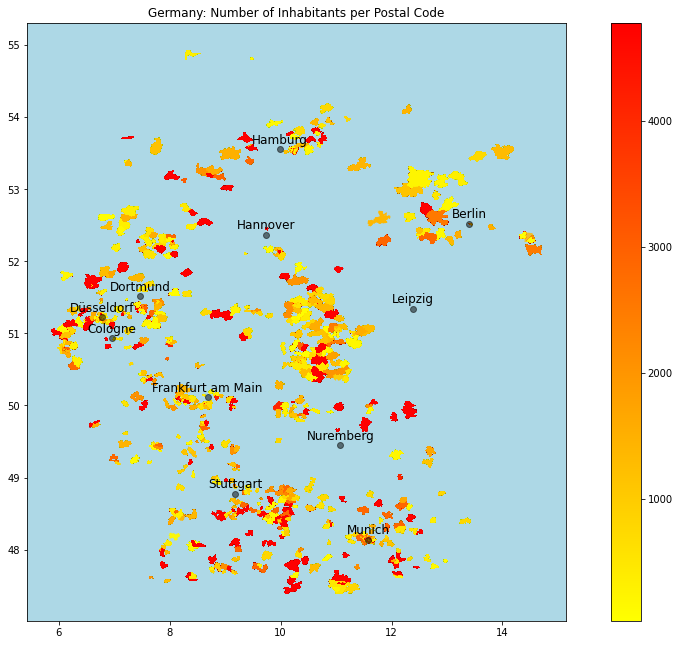

In [75]:
fig, ax = plt.subplots()

joindata_withfinal.plot(
    ax=ax, 
    column='Population_Density', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.8
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Number of Inhabitants per Postal Code', 
    aspect=1.3, 
    facecolor='lightblue'
);

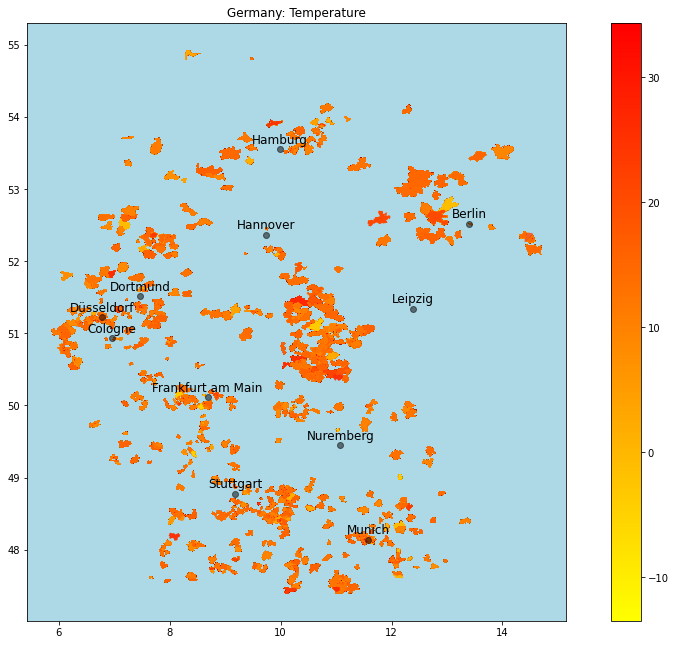

In [76]:
fig, ax = plt.subplots()

joindata_withfinal.plot(
    ax=ax, 
    column='Temperature', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.8
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Temperature', 
    aspect=1.3, 
    facecolor='lightblue'
);

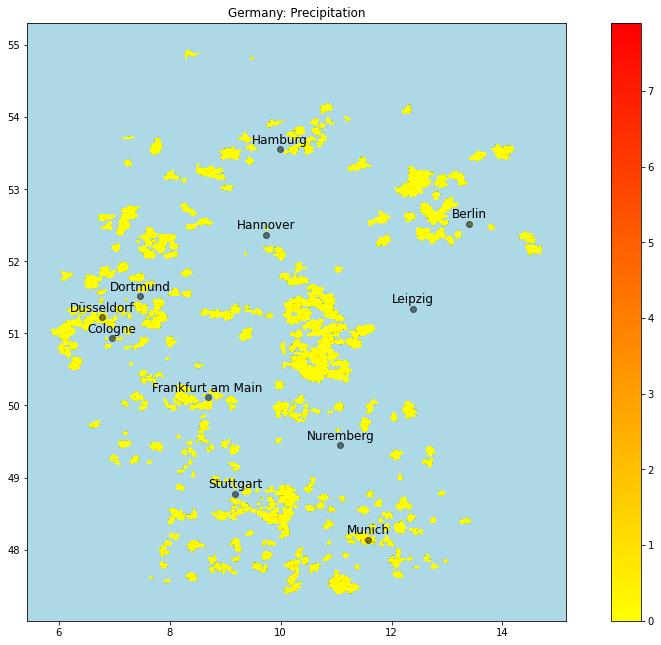

In [77]:
fig, ax = plt.subplots()

joindata_withfinal.plot(
    ax=ax, 
    column='Precipitation', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.8
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Precipitation', 
    aspect=1.3, 
    facecolor='lightblue'
);

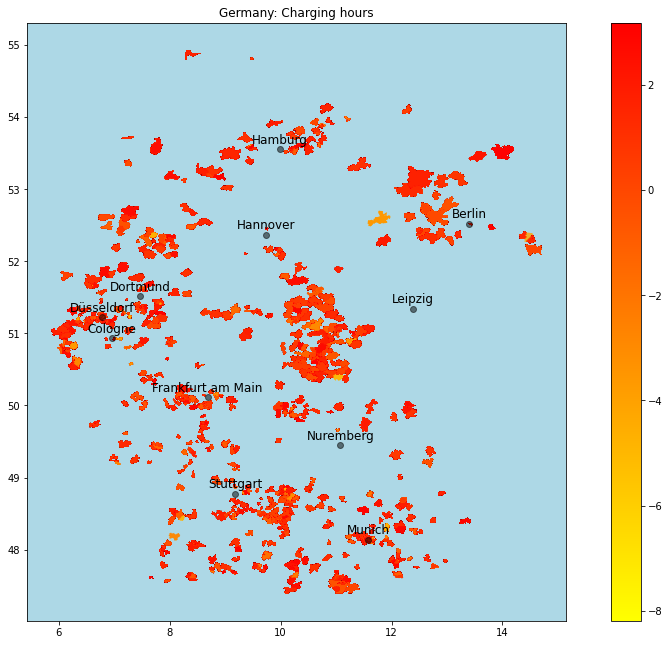

In [78]:
fig, ax = plt.subplots()

joindata_withfinal.plot(
    ax=ax, 
    column='Charging_time_in_hours_log', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.8
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Charging hours', 
    aspect=1.3, 
    facecolor='lightblue'
);

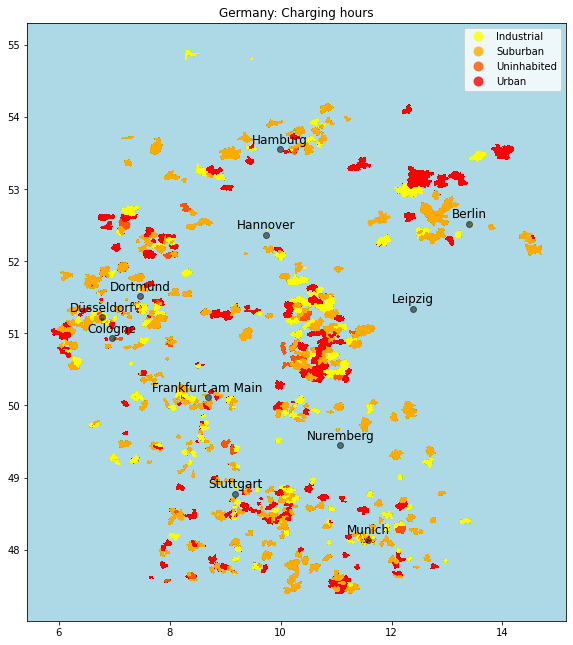

In [79]:
fig, ax = plt.subplots()

joindata_withfinal.plot(
    ax=ax, 
    column='clc_code', 
    categorical=True, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.8
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Charging hours', 
    aspect=1.3, 
    facecolor='lightblue'
);

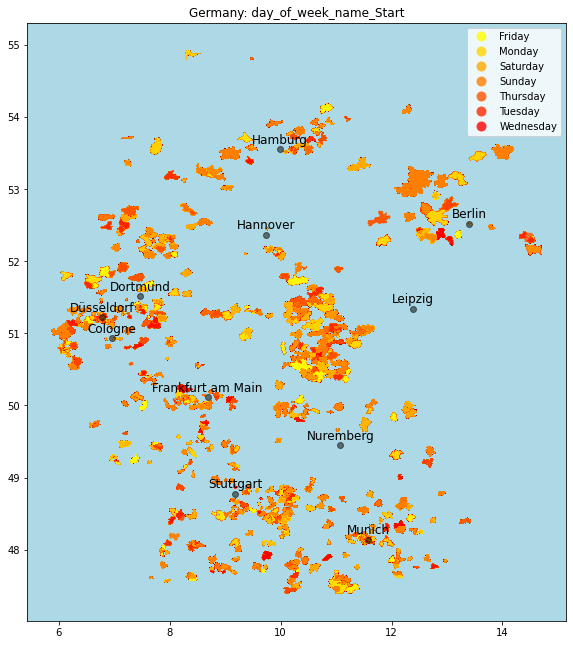

In [80]:
fig, ax = plt.subplots()

joindata_withfinal.plot(
    ax=ax, 
    column='day_of_week_name_Start', 
    categorical=True, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.8
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: day_of_week_name_Start', 
    aspect=1.3, 
    facecolor='lightblue'
);

In [81]:
joindata_withfinal.bundesland.unique()

array(['Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Niedersachsen',
       'Saarland', 'Baden-Württemberg', 'Hessen', 'Schleswig-Holstein',
       'Bayern', 'Thüringen', 'Hamburg', 'Sachsen-Anhalt',
       'Mecklenburg-Vorpommern', 'Brandenburg', 'Berlin', nan],
      dtype=object)

# Statewise 

##  Bayern

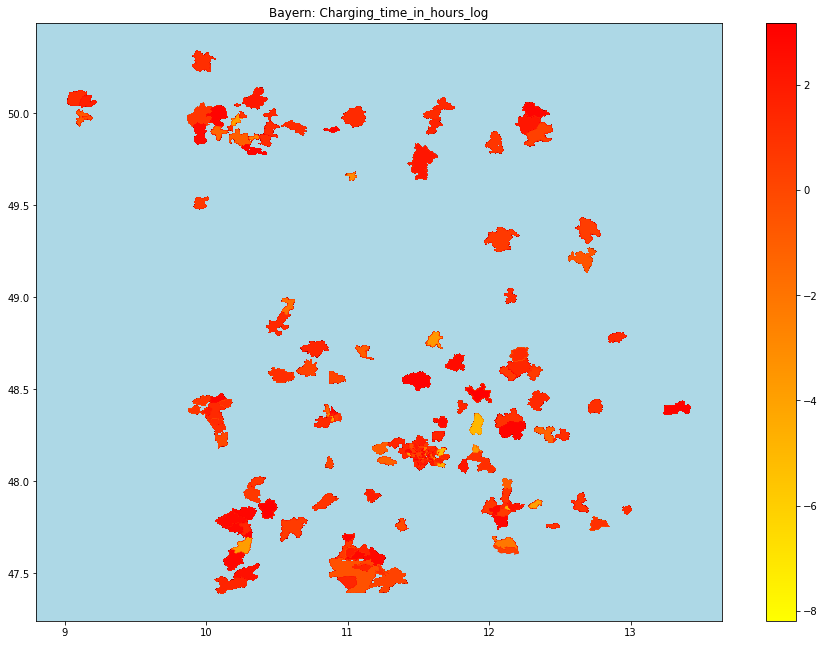

In [82]:
Bayern_df = joindata_withfinal.query('bundesland == "Bayern"')

fig, ax = plt.subplots()

Bayern_df.plot(
    ax=ax, 
    column='Charging_time_in_hours_log', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Bayern: Charging_time_in_hours_log', 
    aspect=1.3,
    facecolor='lightblue'
);


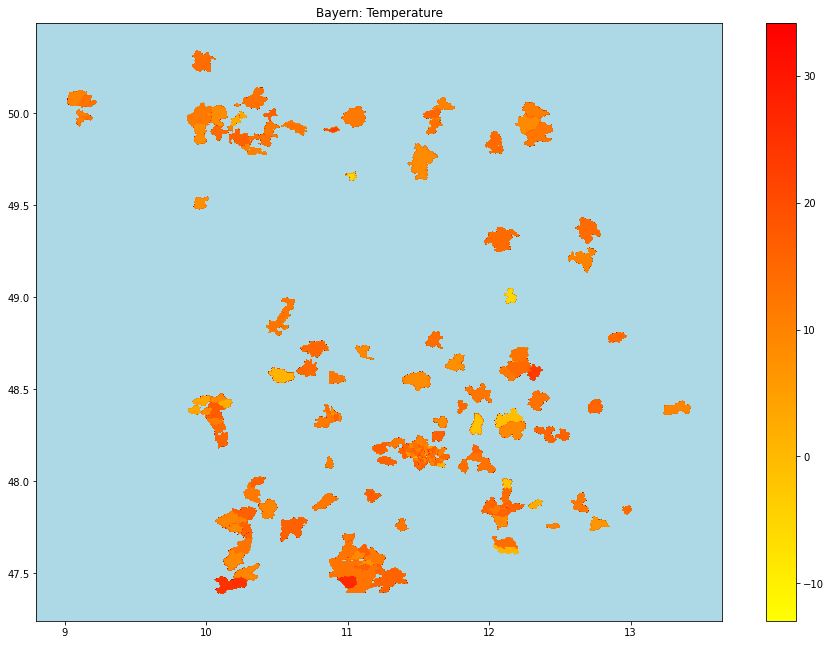

In [83]:
Bayern_df = joindata_withfinal.query('bundesland == "Bayern"')

fig, ax = plt.subplots()

Bayern_df.plot(
    ax=ax, 
    column='Temperature', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Bayern: Temperature', 
    aspect=1.3,
    facecolor='lightblue'
);

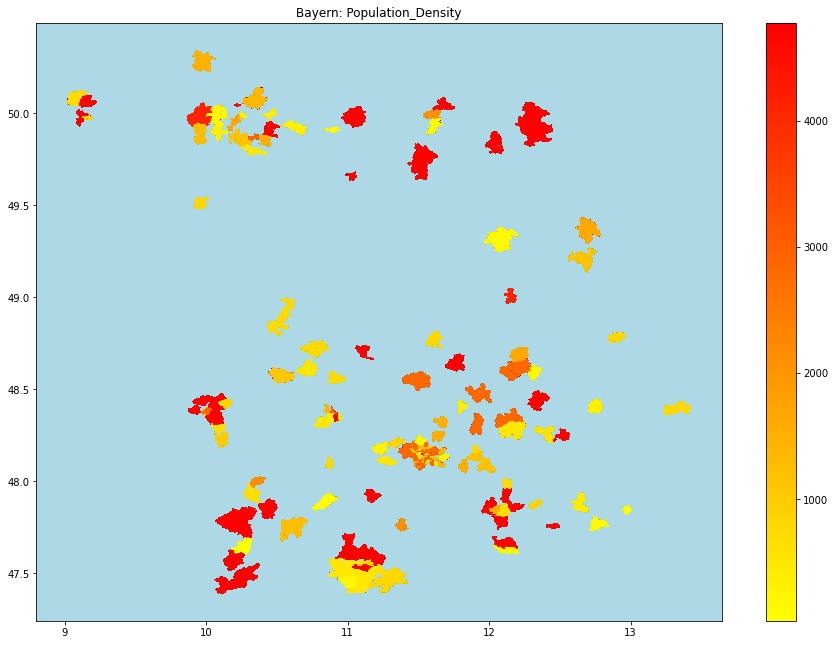

In [84]:
Bayern_df = joindata_withfinal.query('bundesland == "Bayern"')

fig, ax = plt.subplots()

Bayern_df.plot(
    ax=ax, 
    column='Population_Density', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Bayern: Population_Density', 
    aspect=1.3,
    facecolor='lightblue'
);

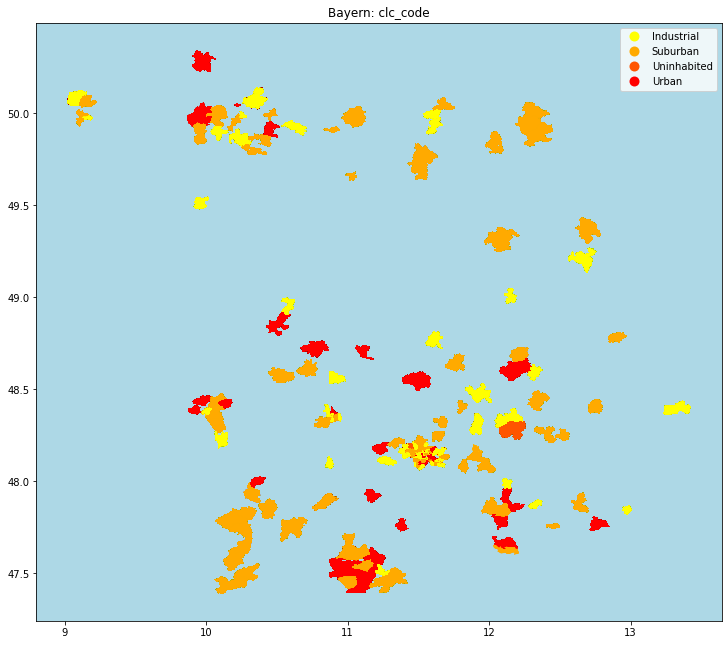

In [85]:
Bayern_df = joindata_withfinal.query('bundesland == "Bayern"')

fig, ax = plt.subplots()

Bayern_df.plot(
    ax=ax, 
    column='clc_code', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Bayern: clc_code', 
    aspect=1.3,
    facecolor='lightblue'
);

# Nordrhein-Westfalen

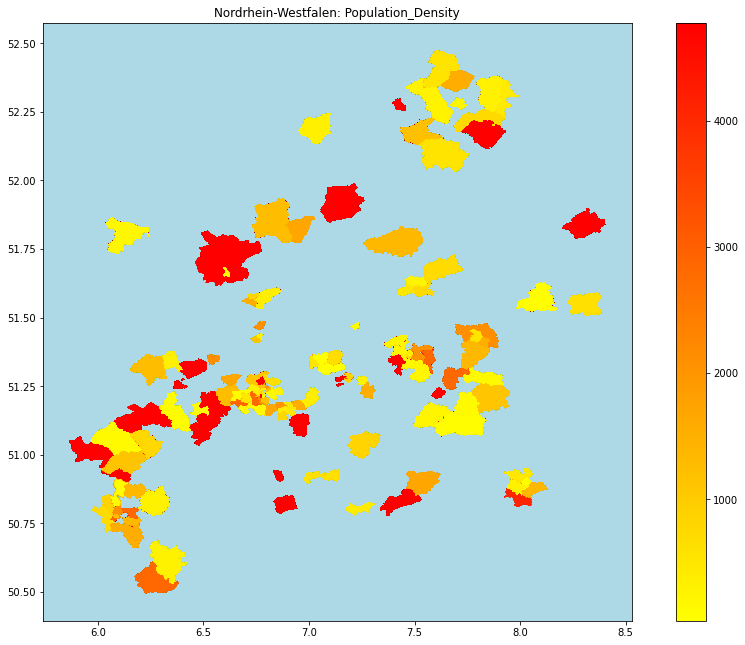

In [86]:
Nordrhein_Westfalen_df = joindata_withfinal.query('bundesland == "Nordrhein-Westfalen"')

fig, ax = plt.subplots()

Nordrhein_Westfalen_df.plot(
    ax=ax, 
    column='Population_Density', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Nordrhein-Westfalen: Population_Density', 
    aspect=1.3,
    facecolor='lightblue'
);

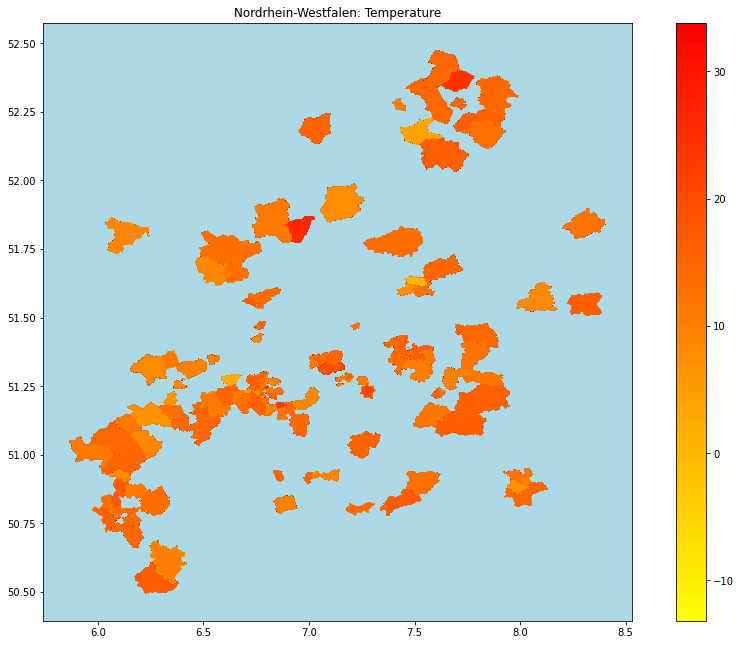

In [87]:
Nordrhein_Westfalen_df = joindata_withfinal.query('bundesland == "Nordrhein-Westfalen"')

fig, ax = plt.subplots()

Nordrhein_Westfalen_df.plot(
    ax=ax, 
    column='Temperature', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Nordrhein-Westfalen: Temperature', 
    aspect=1.3,
    facecolor='lightblue'
);

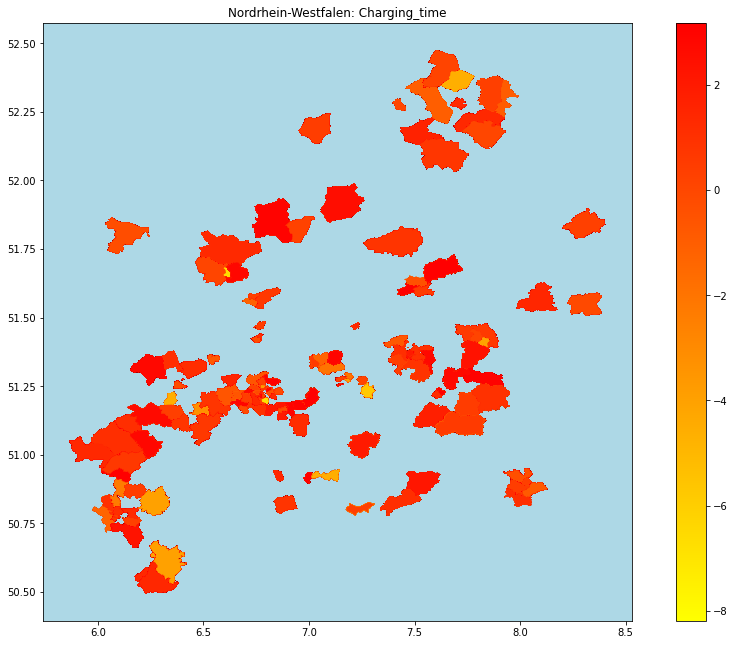

In [88]:
Nordrhein_Westfalen_df = joindata_withfinal.query('bundesland == "Nordrhein-Westfalen"')

fig, ax = plt.subplots()

Nordrhein_Westfalen_df.plot(
    ax=ax, 
    column='Charging_time_in_hours_log', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Nordrhein-Westfalen: Charging_time', 
    aspect=1.3,
    facecolor='lightblue'
);


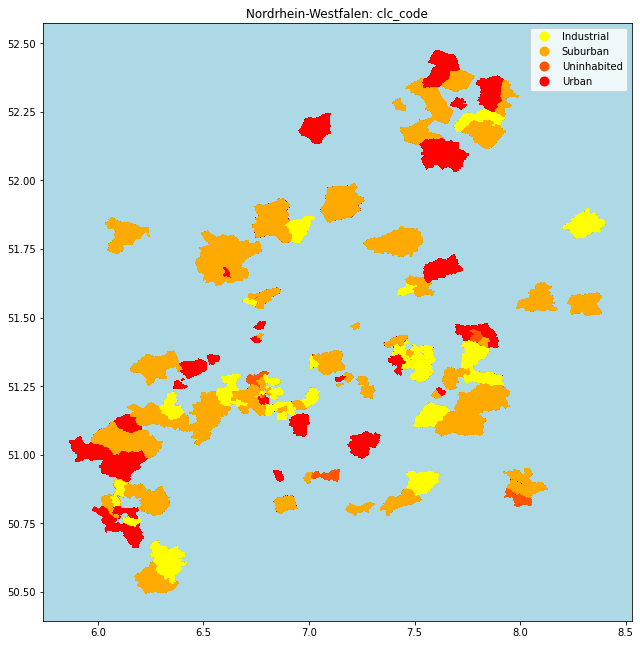

In [89]:
Nordrhein_Westfalen_df = joindata_withfinal.query('bundesland == "Nordrhein-Westfalen"')

fig, ax = plt.subplots()

Nordrhein_Westfalen_df.plot(
    ax=ax, 
    column='clc_code', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Nordrhein-Westfalen: clc_code', 
    aspect=1.3,
    facecolor='lightblue'
);

# Baden-Württemberg

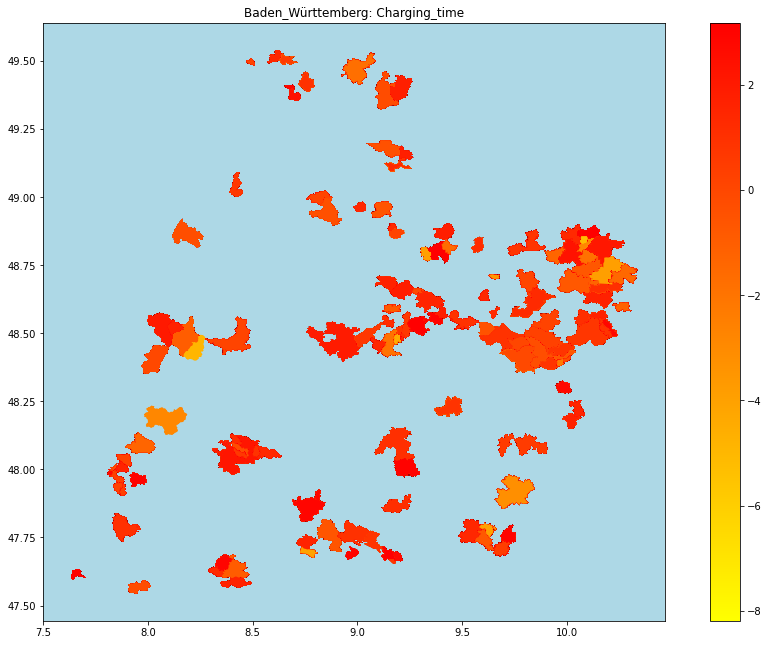

In [90]:

Baden_Württemberg_df = joindata_withfinal.query('bundesland == "Baden-Württemberg"')

fig, ax = plt.subplots()

Baden_Württemberg_df.plot(
    ax=ax, 
    column='Charging_time_in_hours_log', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Baden_Württemberg: Charging_time', 
    aspect=1.3,
    facecolor='lightblue'
);

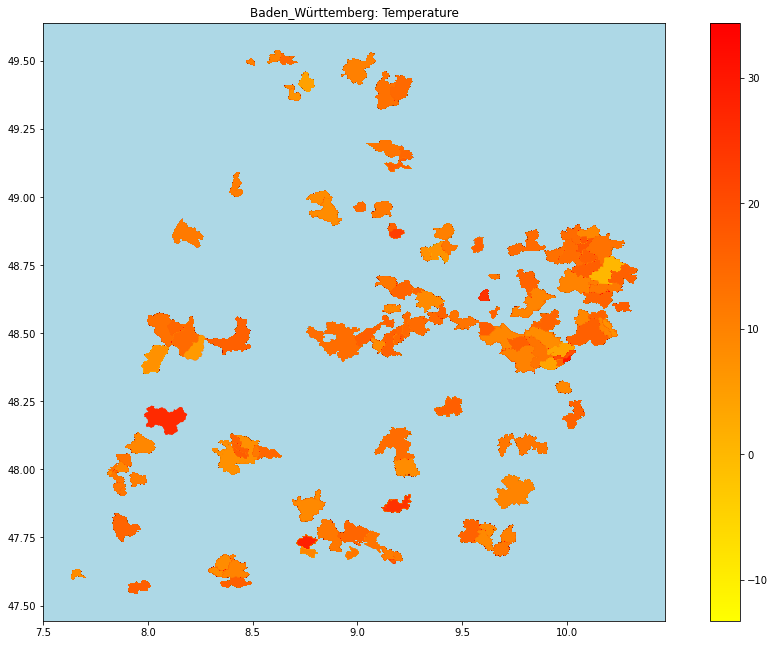

In [91]:
Baden_Württemberg_df = joindata_withfinal.query('bundesland == "Baden-Württemberg"')

fig, ax = plt.subplots()

Baden_Württemberg_df.plot(
    ax=ax, 
    column='Temperature', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Baden_Württemberg: Temperature', 
    aspect=1.3,
    facecolor='lightblue'
);

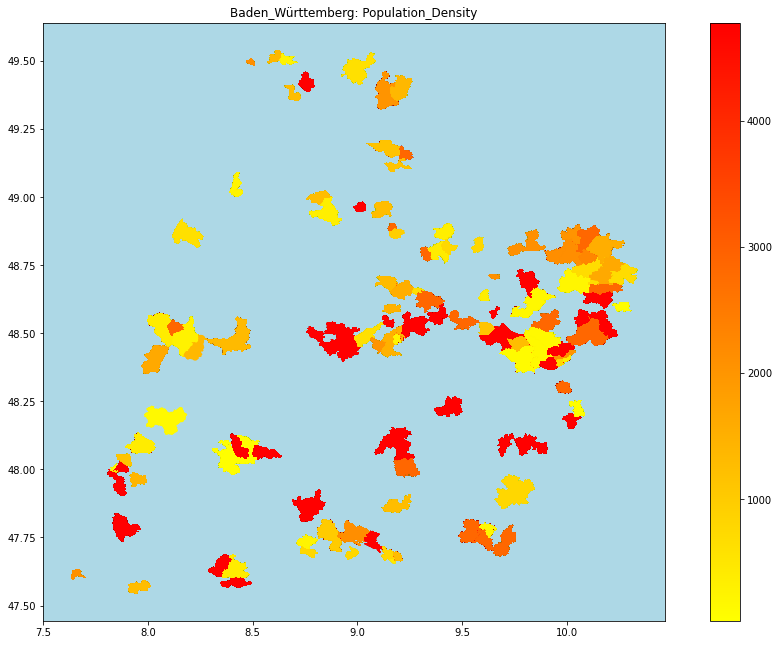

In [92]:
Baden_Württemberg_df = joindata_withfinal.query('bundesland == "Baden-Württemberg"')

fig, ax = plt.subplots()

Baden_Württemberg_df.plot(
    ax=ax, 
    column='Population_Density', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Baden_Württemberg: Population_Density', 
    aspect=1.3,
    facecolor='lightblue'
);

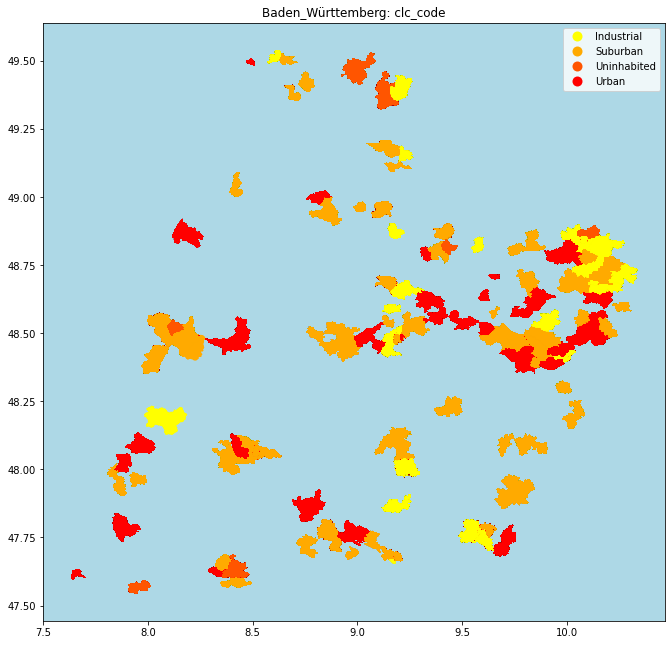

In [93]:
Baden_Württemberg_df = joindata_withfinal.query('bundesland == "Baden-Württemberg"')

fig, ax = plt.subplots()

Baden_Württemberg_df.plot(
    ax=ax, 
    column='clc_code', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Baden_Württemberg: clc_code', 
    aspect=1.3,
    facecolor='lightblue'
);

# Thüringen

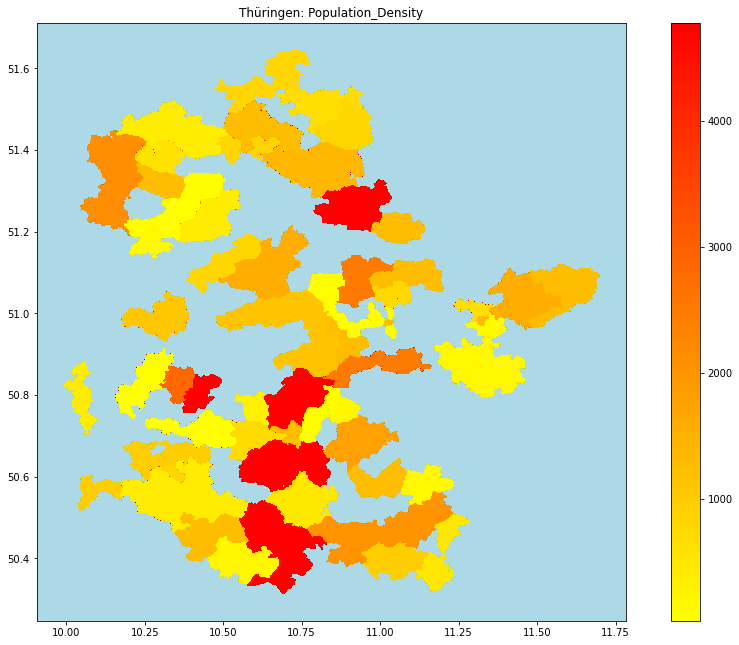

In [94]:
Thüringen_df = joindata_withfinal.query('bundesland == "Thüringen"')

fig, ax = plt.subplots()

Thüringen_df.plot(
    ax=ax, 
    column='Population_Density', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Thüringen: Population_Density', 
    aspect=1.3,
    facecolor='lightblue'
);

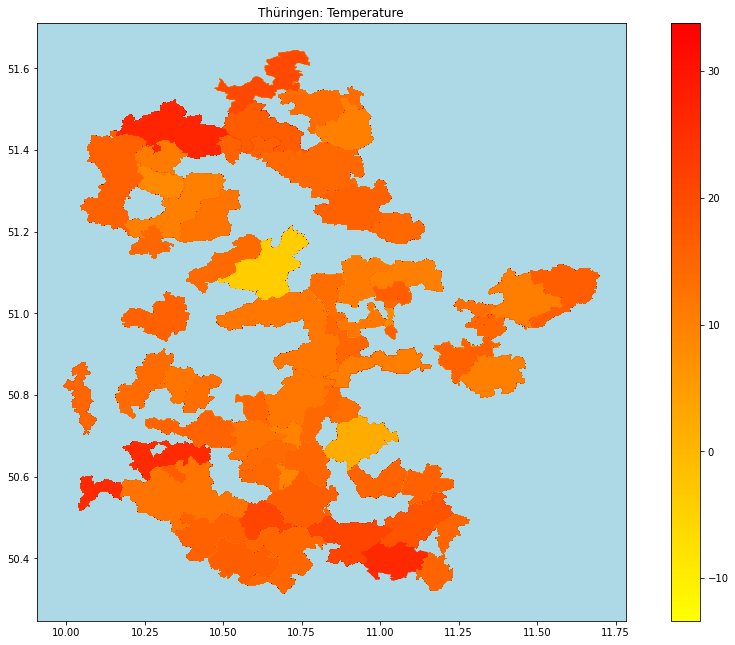

In [95]:
Thüringen_df = joindata_withfinal.query('bundesland == "Thüringen"')

fig, ax = plt.subplots()

Thüringen_df.plot(
    ax=ax, 
    column='Temperature', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Thüringen: Temperature', 
    aspect=1.3,
    facecolor='lightblue'
);

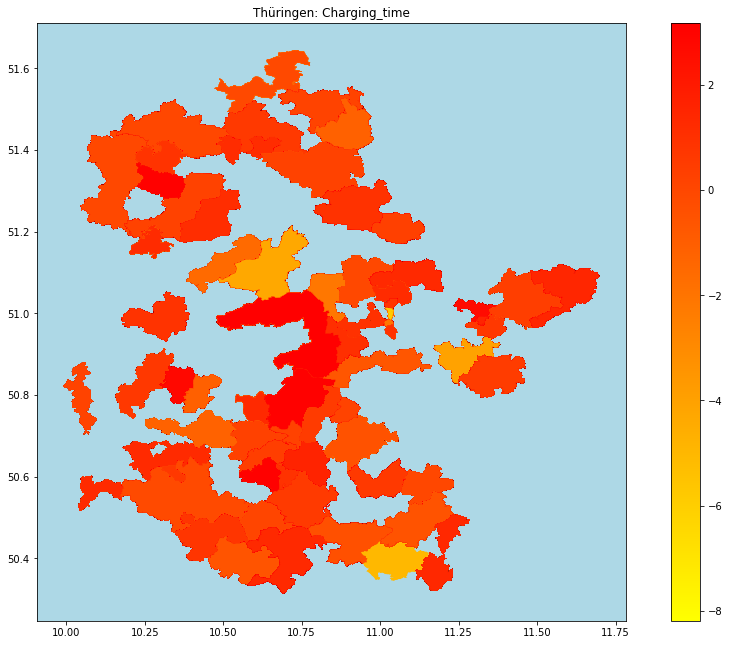

In [96]:
Thüringen_df = joindata_withfinal.query('bundesland == "Thüringen"')

fig, ax = plt.subplots()

Thüringen_df.plot(
    ax=ax, 
    column='Charging_time_in_hours_log', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Thüringen: Charging_time', 
    aspect=1.3,
    facecolor='lightblue'
);

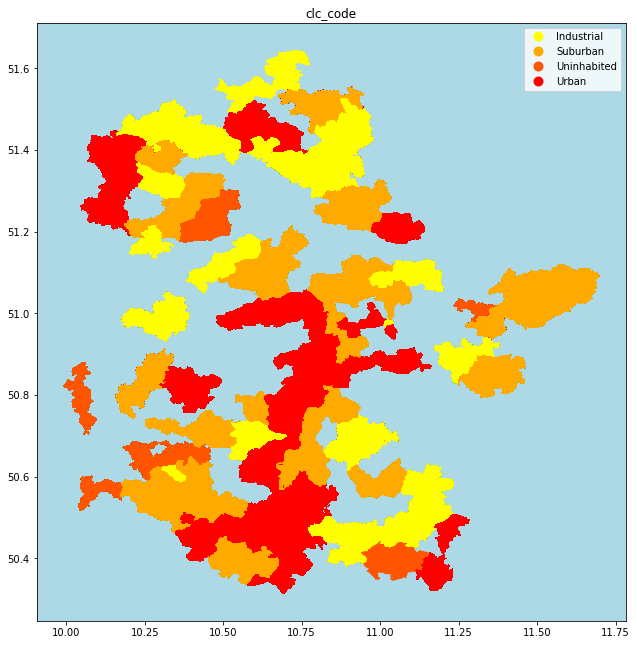

In [97]:
Thüringen_df = joindata_withfinal.query('bundesland == "Thüringen"')

fig, ax = plt.subplots()

Thüringen_df.plot(
    ax=ax, 
    column='clc_code', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='clc_code', 
    aspect=1.3,
    facecolor='lightblue'
);

# Mecklenburg-Vorpommern

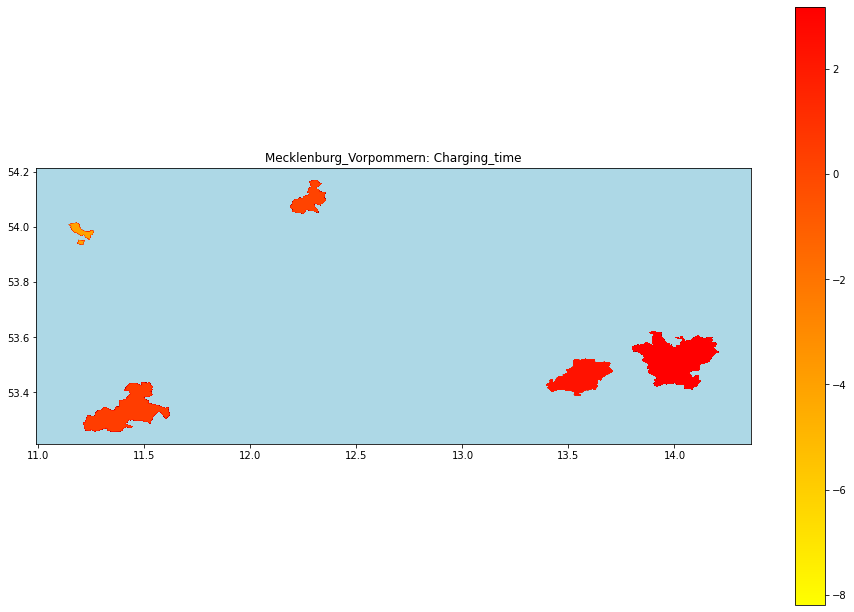

In [98]:
Mecklenburg_Vorpommern_df = joindata_withfinal.query('bundesland == "Mecklenburg-Vorpommern"')

fig, ax = plt.subplots()

Mecklenburg_Vorpommern_df.plot(
    ax=ax, 
    column='Charging_time_in_hours_log', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Mecklenburg_Vorpommern: Charging_time', 
    aspect=1.3,
    facecolor='lightblue'
);

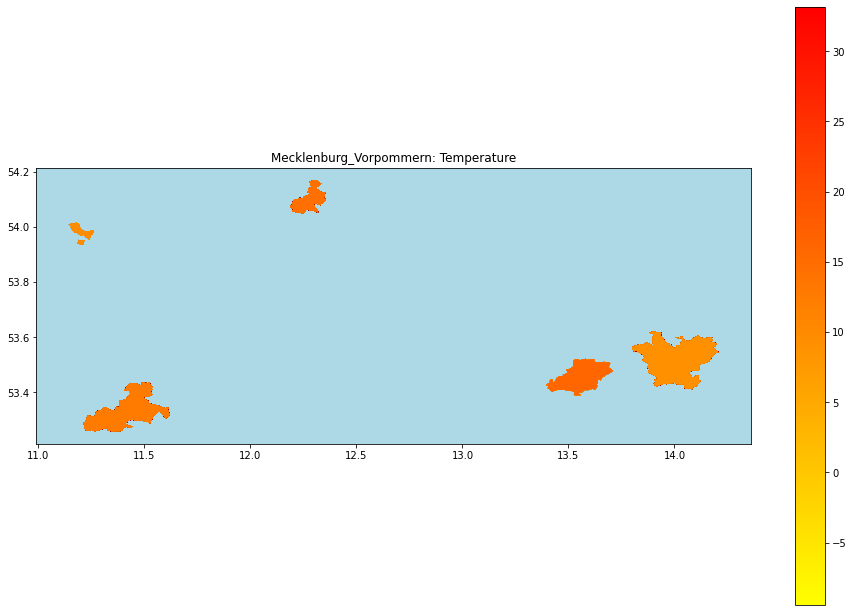

In [99]:
Mecklenburg_Vorpommern_df = joindata_withfinal.query('bundesland == "Mecklenburg-Vorpommern"')

fig, ax = plt.subplots()

Mecklenburg_Vorpommern_df.plot(
    ax=ax, 
    column='Temperature', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Mecklenburg_Vorpommern: Temperature', 
    aspect=1.3,
    facecolor='lightblue'
);

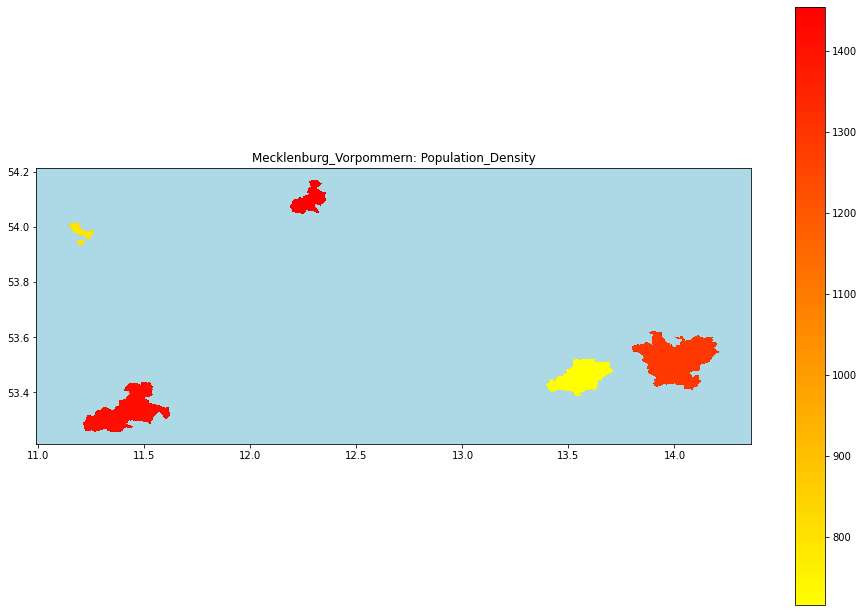

In [100]:
Mecklenburg_Vorpommern_df = joindata_withfinal.query('bundesland == "Mecklenburg-Vorpommern"')

fig, ax = plt.subplots()

Mecklenburg_Vorpommern_df.plot(
    ax=ax, 
    column='Population_Density', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Mecklenburg_Vorpommern: Population_Density', 
    aspect=1.3,
    facecolor='lightblue'
);

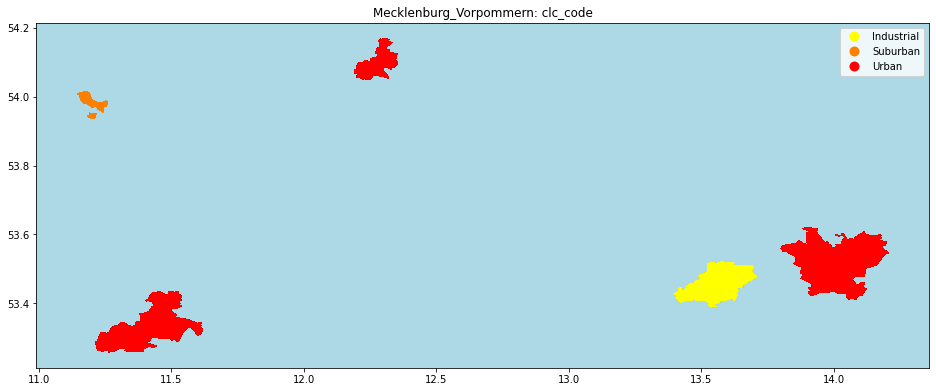

In [101]:
Mecklenburg_Vorpommern_df = joindata_withfinal.query('bundesland == "Mecklenburg-Vorpommern"')

fig, ax = plt.subplots()

Mecklenburg_Vorpommern_df.plot(
    ax=ax, 
    column='clc_code', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Mecklenburg_Vorpommern: clc_code', 
    aspect=1.3,
    facecolor='lightblue'
);

# Hessen

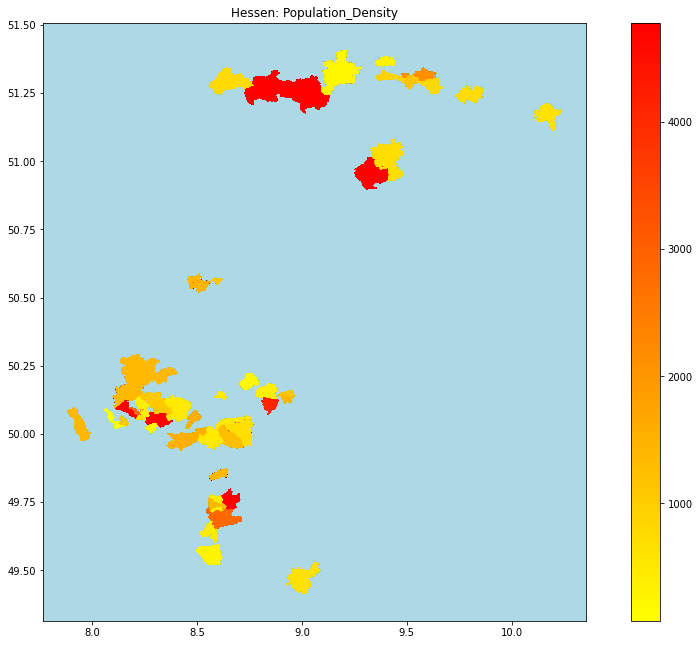

In [102]:
Hessen_df = joindata_withfinal.query('bundesland == "Hessen"')

fig, ax = plt.subplots()

Hessen_df.plot(
    ax=ax, 
    column='Population_Density', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Hessen: Population_Density', 
    aspect=1.3,
    facecolor='lightblue'
);

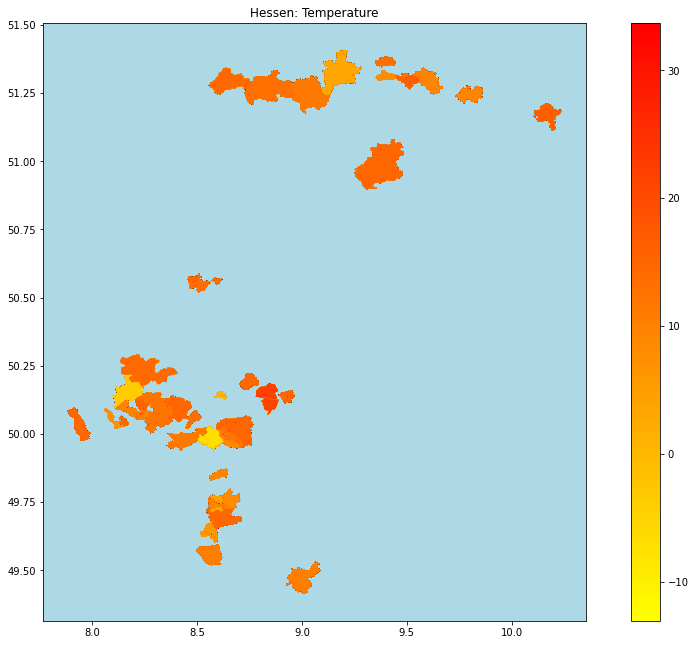

In [103]:
Hessen_df = joindata_withfinal.query('bundesland == "Hessen"')

fig, ax = plt.subplots()

Hessen_df.plot(
    ax=ax, 
    column='Temperature', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Hessen: Temperature', 
    aspect=1.3,
    facecolor='lightblue'
);

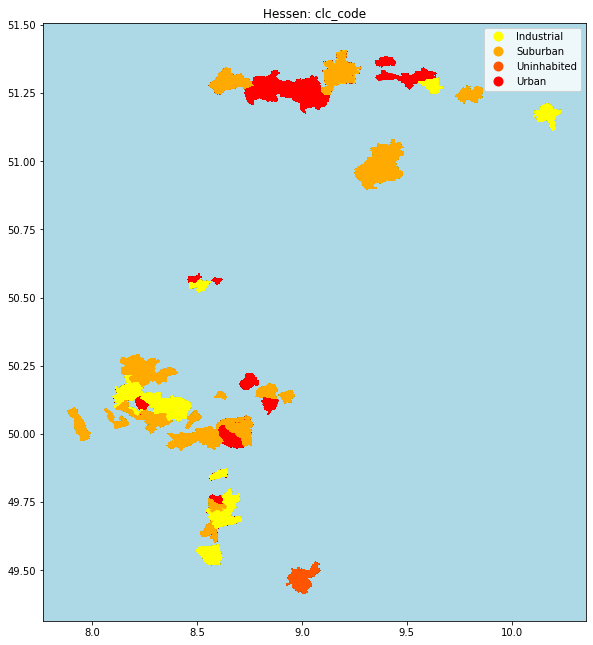

In [104]:
Hessen_df = joindata_withfinal.query('bundesland == "Hessen"')

fig, ax = plt.subplots()

Hessen_df.plot(
    ax=ax, 
    column='clc_code', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Hessen: clc_code', 
    aspect=1.3,
    facecolor='lightblue'
);

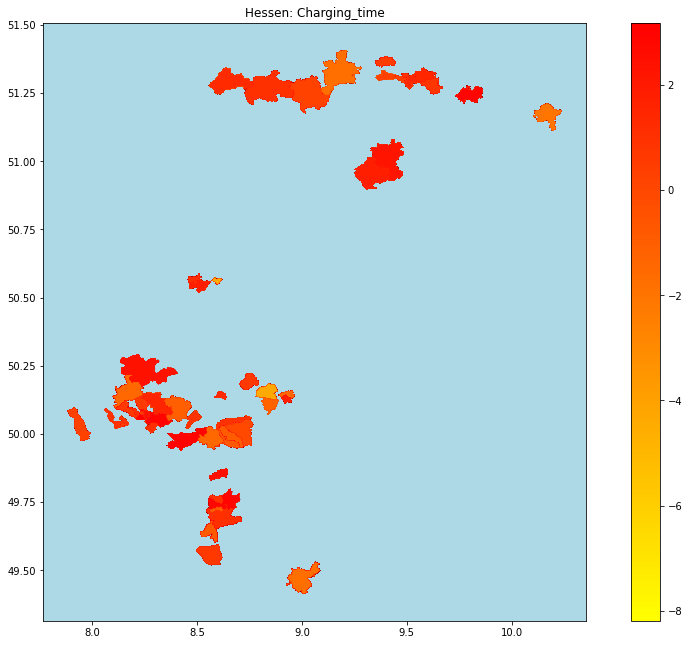

In [105]:


Hessen_df = joindata_withfinal.query('bundesland == "Hessen"')

fig, ax = plt.subplots()

Hessen_df.plot(
    ax=ax, 
    column='Charging_time_in_hours_log', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Hessen: Charging_time', 
    aspect=1.3,
    facecolor='lightblue'
);

# Brandenburg

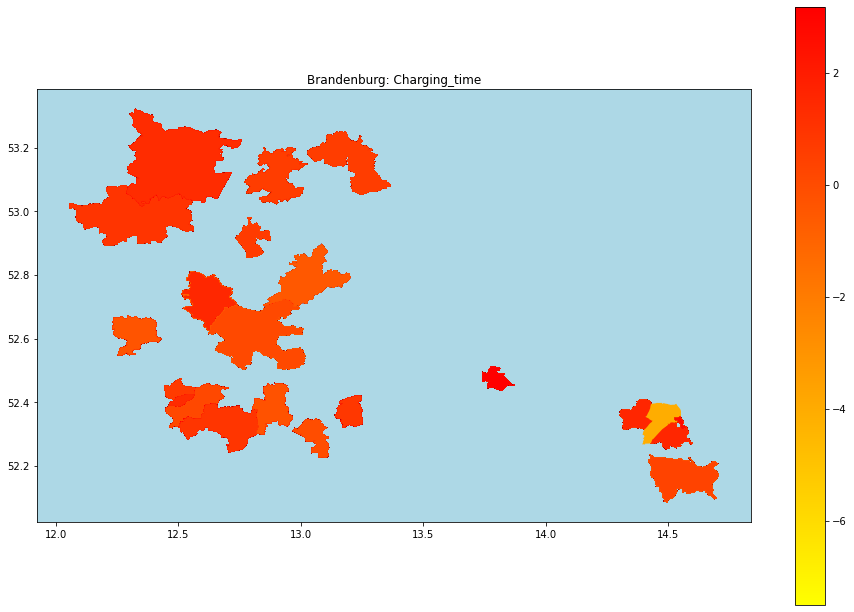

In [106]:
Brandenburg_df = joindata_withfinal.query('bundesland == "Brandenburg"')

fig, ax = plt.subplots()

Brandenburg_df.plot(
    ax=ax, 
    column='Charging_time_in_hours_log', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Brandenburg: Charging_time', 
    aspect=1.3,
    facecolor='lightblue'
);

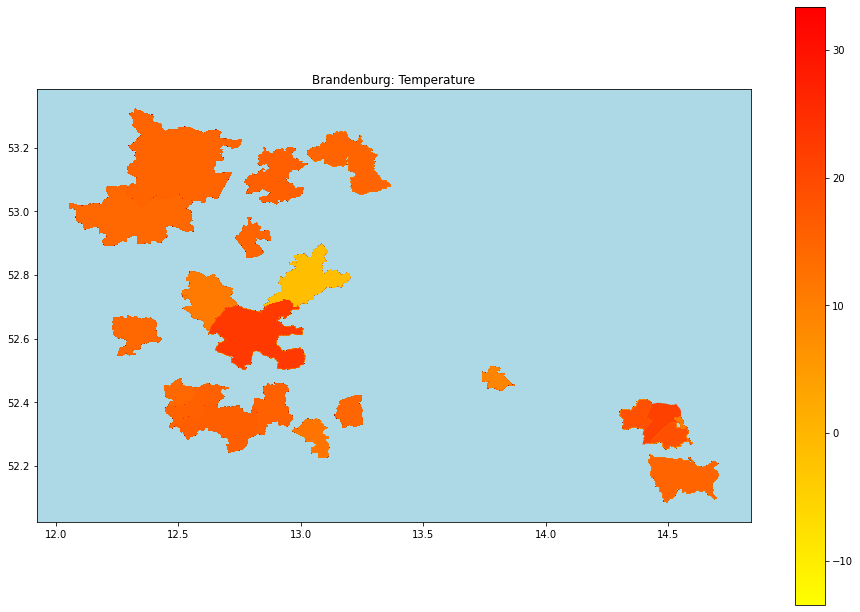

In [107]:
Brandenburg_df = joindata_withfinal.query('bundesland == "Brandenburg"')

fig, ax = plt.subplots()

Brandenburg_df.plot(
    ax=ax, 
    column='Temperature', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Brandenburg: Temperature', 
    aspect=1.3,
    facecolor='lightblue'
);

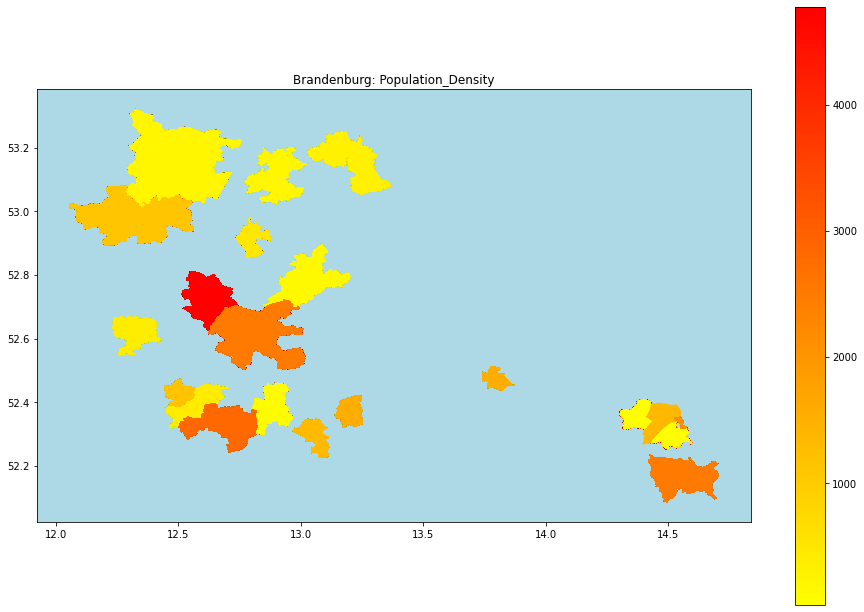

In [108]:
Brandenburg_df = joindata_withfinal.query('bundesland == "Brandenburg"')

fig, ax = plt.subplots()

Brandenburg_df.plot(
    ax=ax, 
    column='Population_Density', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Brandenburg: Population_Density', 
    aspect=1.3,
    facecolor='lightblue'
);

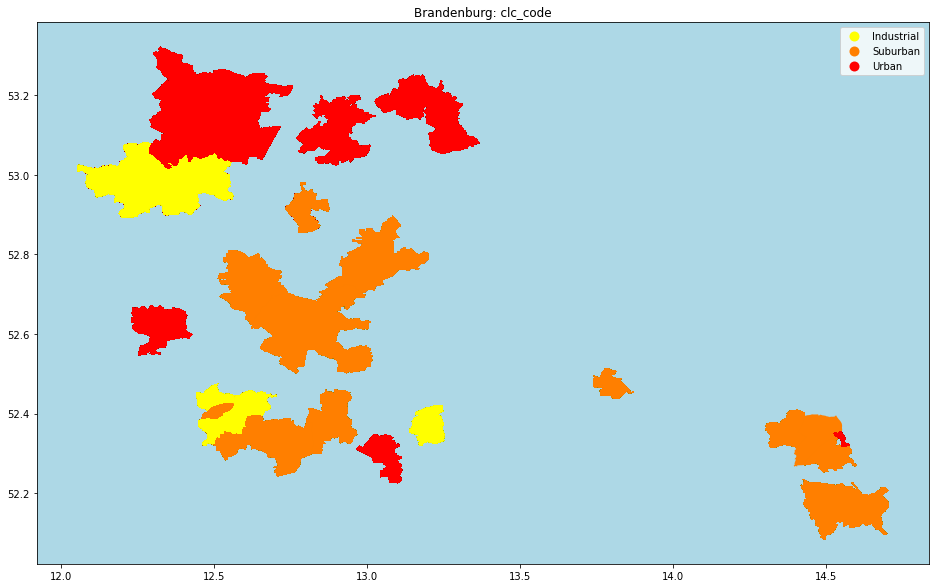

In [109]:
Brandenburg_df = joindata_withfinal.query('bundesland == "Brandenburg"')

fig, ax = plt.subplots()

Brandenburg_df.plot(
    ax=ax, 
    column='clc_code', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Brandenburg: clc_code', 
    aspect=1.3,
    facecolor='lightblue'
);

# Rheinland-Pfalz

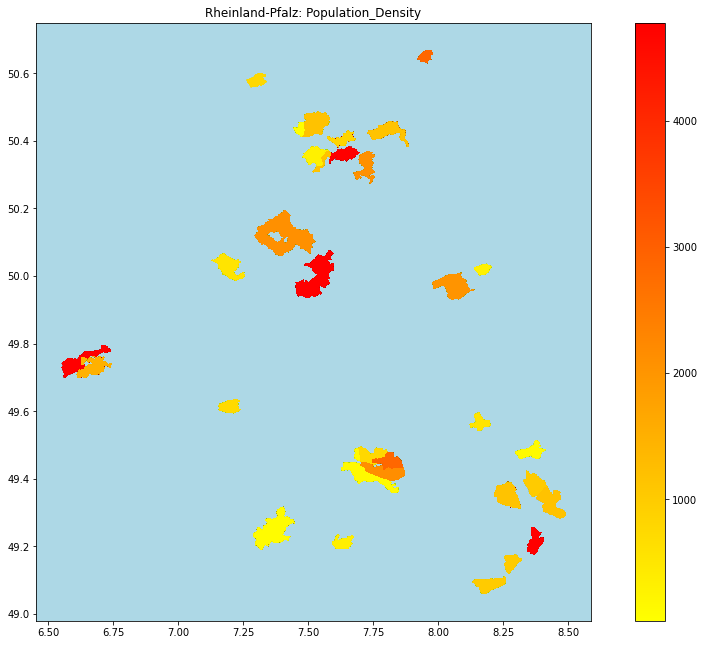

In [110]:

Rheinland_Pfalz_df = joindata_withfinal.query('bundesland == "Rheinland-Pfalz"')

fig, ax = plt.subplots()

Rheinland_Pfalz_df.plot(
    ax=ax, 
    column='Population_Density', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Rheinland-Pfalz: Population_Density', 
    aspect=1.3,
    facecolor='lightblue'
);

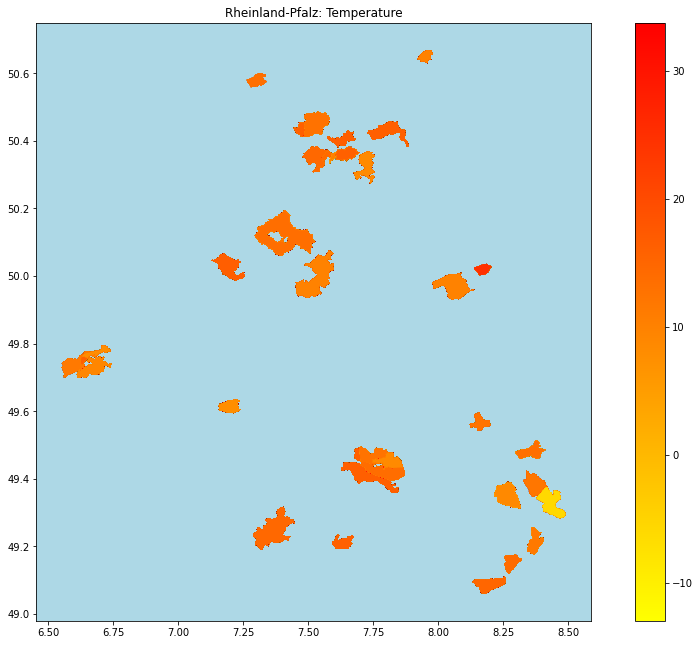

In [111]:
Rheinland_Pfalz_df = joindata_withfinal.query('bundesland == "Rheinland-Pfalz"')

fig, ax = plt.subplots()

Rheinland_Pfalz_df.plot(
    ax=ax, 
    column='Temperature', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Rheinland-Pfalz: Temperature', 
    aspect=1.3,
    facecolor='lightblue'
);

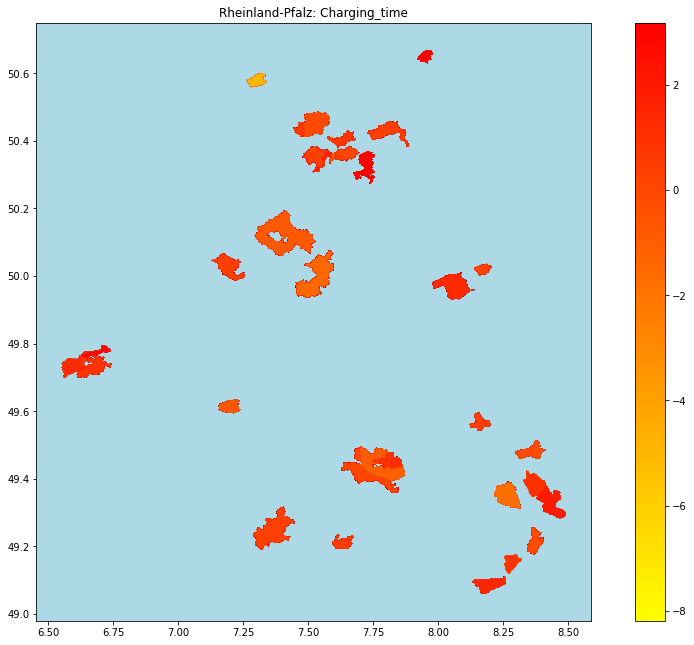

In [112]:
Rheinland_Pfalz_df = joindata_withfinal.query('bundesland == "Rheinland-Pfalz"')

fig, ax = plt.subplots()

Rheinland_Pfalz_df.plot(
    ax=ax, 
    column='Charging_time_in_hours_log', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Rheinland-Pfalz: Charging_time', 
    aspect=1.3,
    facecolor='lightblue'
);

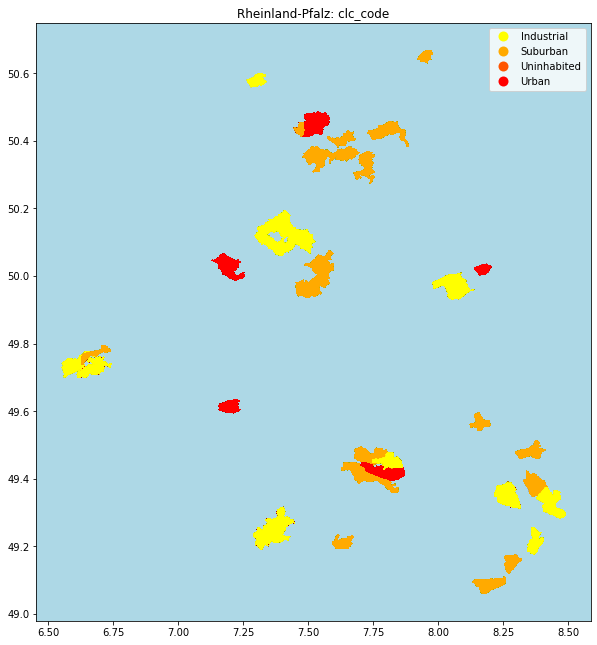

In [113]:
Rheinland_Pfalz_df = joindata_withfinal.query('bundesland == "Rheinland-Pfalz"')

fig, ax = plt.subplots()

Rheinland_Pfalz_df.plot(
    ax=ax, 
    column='clc_code', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Rheinland-Pfalz: clc_code', 
    aspect=1.3,
    facecolor='lightblue'
);

# Niedersachsen

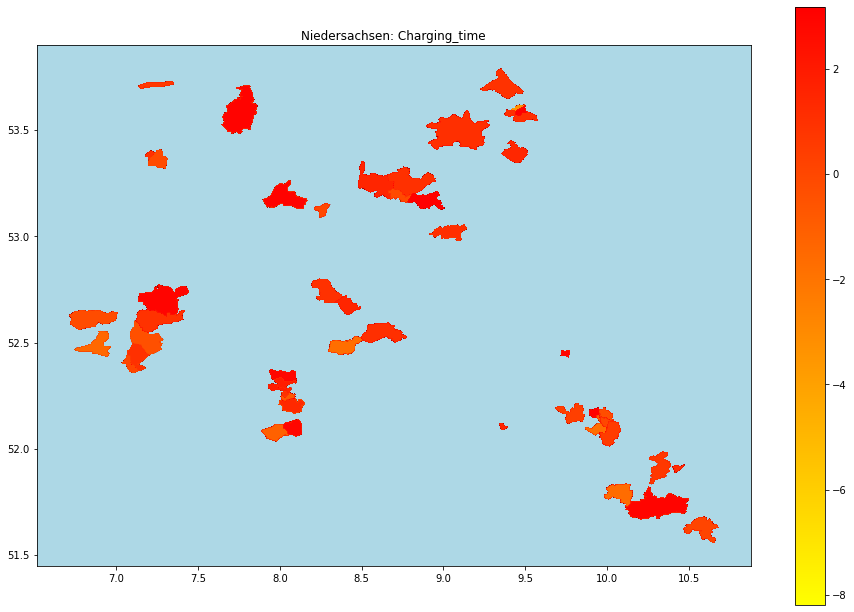

In [114]:
Niedersachsen_df = joindata_withfinal.query('bundesland == "Niedersachsen"')

fig, ax = plt.subplots()

Niedersachsen_df.plot(
    ax=ax, 
    column='Charging_time_in_hours_log', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Niedersachsen: Charging_time', 
    aspect=1.3,
    facecolor='lightblue'
);

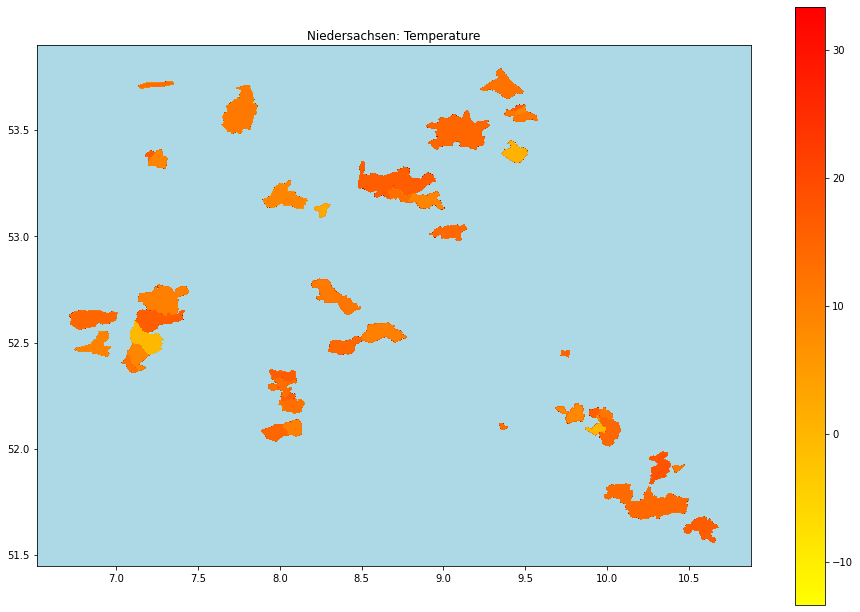

In [115]:
Niedersachsen_df = joindata_withfinal.query('bundesland == "Niedersachsen"')

fig, ax = plt.subplots()

Niedersachsen_df.plot(
    ax=ax, 
    column='Temperature', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Niedersachsen: Temperature', 
    aspect=1.3,
    facecolor='lightblue'
);

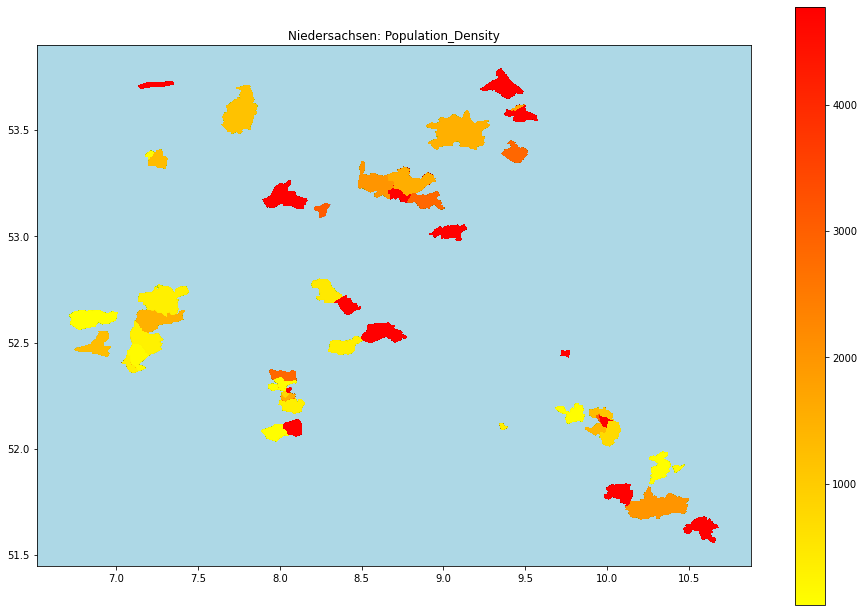

In [116]:
Niedersachsen_df = joindata_withfinal.query('bundesland == "Niedersachsen"')

fig, ax = plt.subplots()

Niedersachsen_df.plot(
    ax=ax, 
    column='Population_Density', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Niedersachsen: Population_Density', 
    aspect=1.3,
    facecolor='lightblue'
);

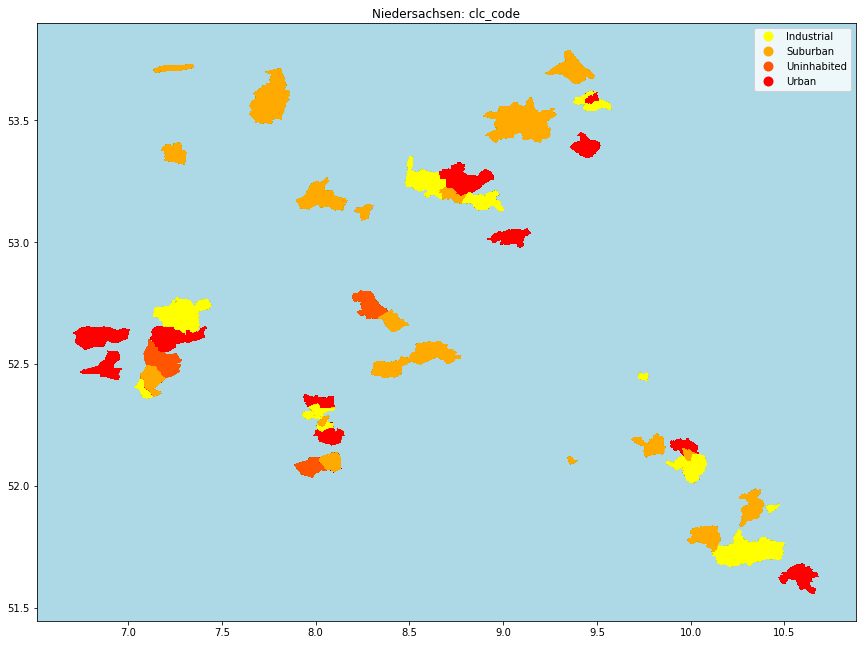

In [117]:
Niedersachsen_df = joindata_withfinal.query('bundesland == "Niedersachsen"')

fig, ax = plt.subplots()

Niedersachsen_df.plot(
    ax=ax, 
    column='clc_code', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Niedersachsen: clc_code', 
    aspect=1.3,
    facecolor='lightblue'
);

# Schleswig-Holstein

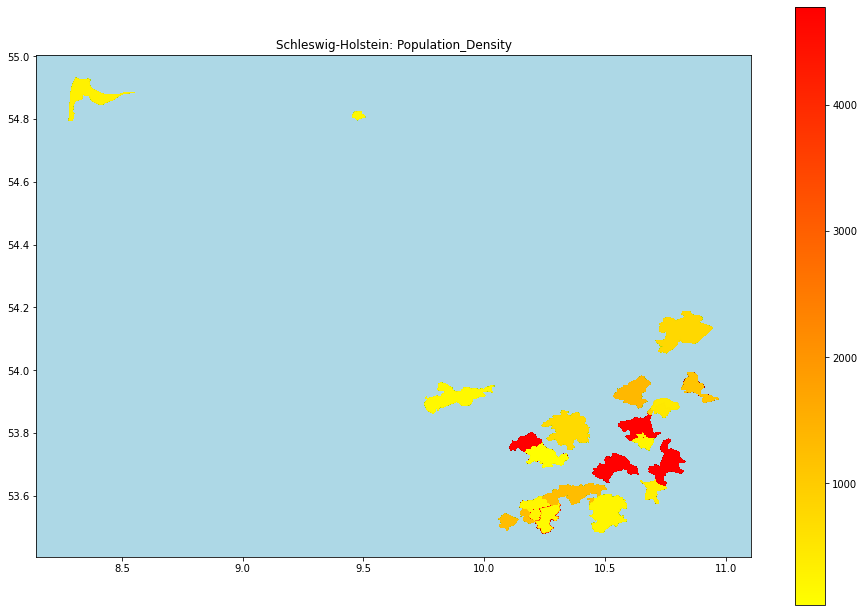

In [118]:
Schleswig_Holstein_df = joindata_withfinal.query('bundesland == "Schleswig-Holstein"')

fig, ax = plt.subplots()

Schleswig_Holstein_df.plot(
    ax=ax, 
    column='Population_Density', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Schleswig-Holstein: Population_Density', 
    aspect=1.3,
    facecolor='lightblue'
);

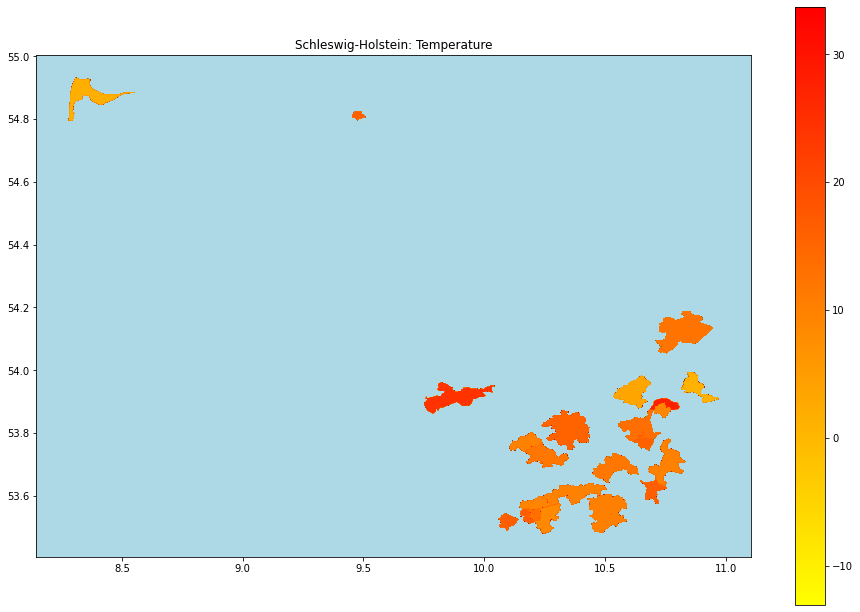

In [119]:
Schleswig_Holstein_df = joindata_withfinal.query('bundesland == "Schleswig-Holstein"')

fig, ax = plt.subplots()

Schleswig_Holstein_df.plot(
    ax=ax, 
    column='Temperature', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Schleswig-Holstein: Temperature', 
    aspect=1.3,
    facecolor='lightblue'
);

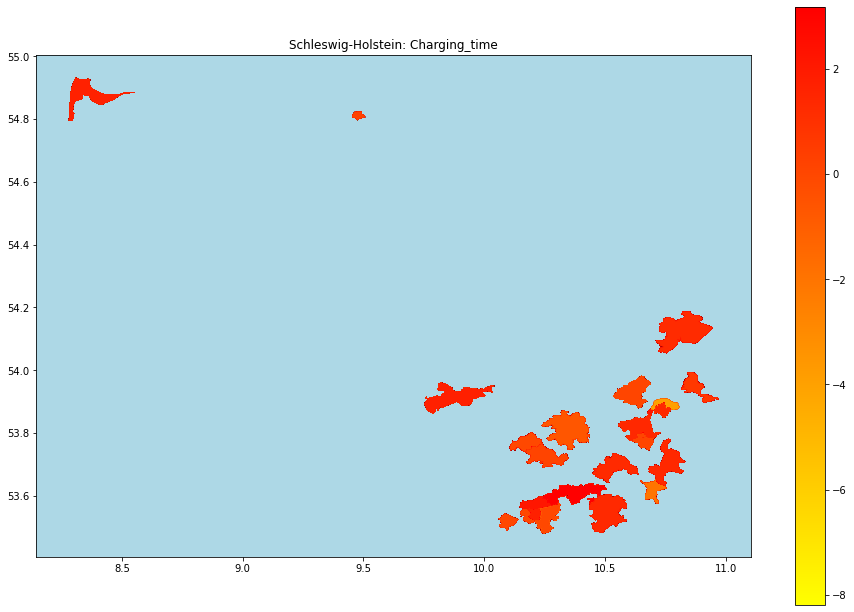

In [120]:
Schleswig_Holstein_df = joindata_withfinal.query('bundesland == "Schleswig-Holstein"')

fig, ax = plt.subplots()

Schleswig_Holstein_df.plot(
    ax=ax, 
    column='Charging_time_in_hours_log', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Schleswig-Holstein: Charging_time', 
    aspect=1.3,
    facecolor='lightblue'
);

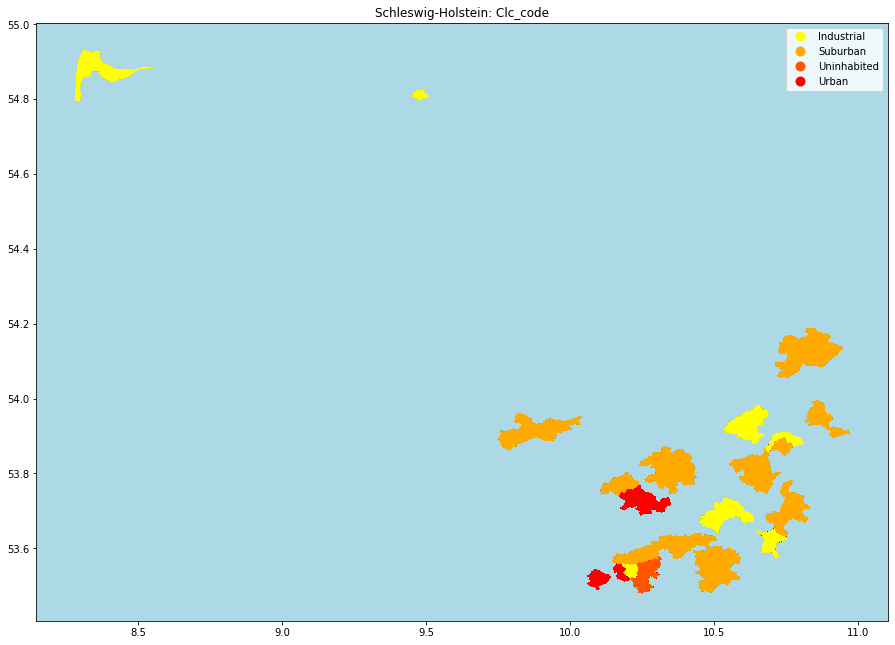

In [121]:
Schleswig_Holstein_df = joindata_withfinal.query('bundesland == "Schleswig-Holstein"')

fig, ax = plt.subplots()

Schleswig_Holstein_df.plot(
    ax=ax, 
    column='clc_code', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Schleswig-Holstein: Clc_code', 
    aspect=1.3,
    facecolor='lightblue'
);

# Saarland

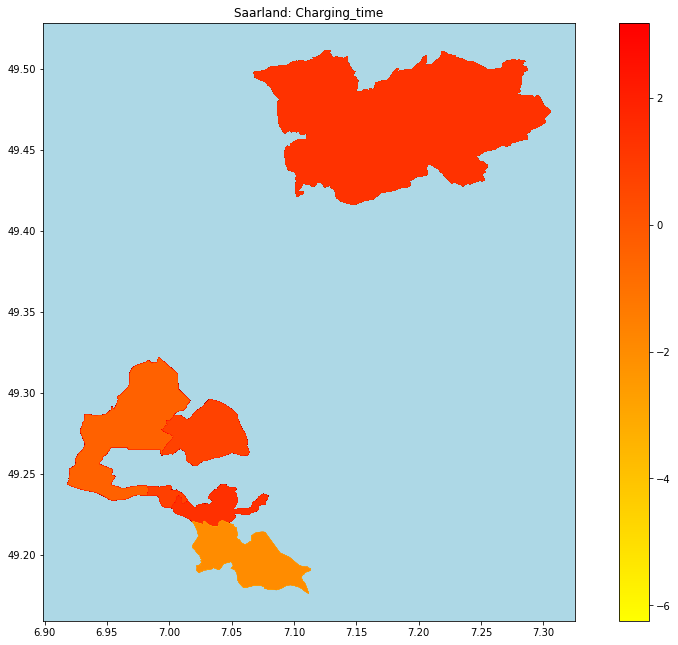

In [122]:
Saarland_df = joindata_withfinal.query('bundesland == "Saarland"')

fig, ax = plt.subplots()

Saarland_df.plot(
    ax=ax, 
    column='Charging_time_in_hours_log', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Saarland: Charging_time', 
    aspect=1.3,
    facecolor='lightblue'
);


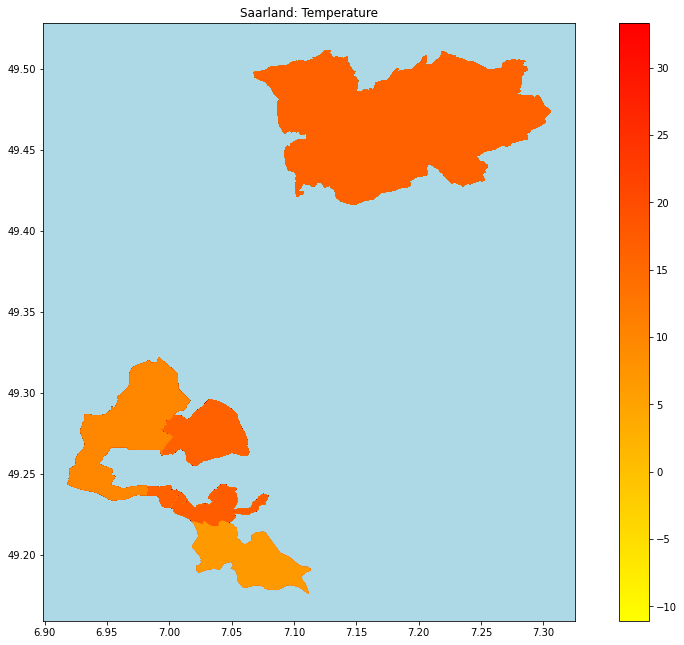

In [123]:
Saarland_df = joindata_withfinal.query('bundesland == "Saarland"')

fig, ax = plt.subplots()

Saarland_df.plot(
    ax=ax, 
    column='Temperature', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Saarland: Temperature', 
    aspect=1.3,
    facecolor='lightblue'
);

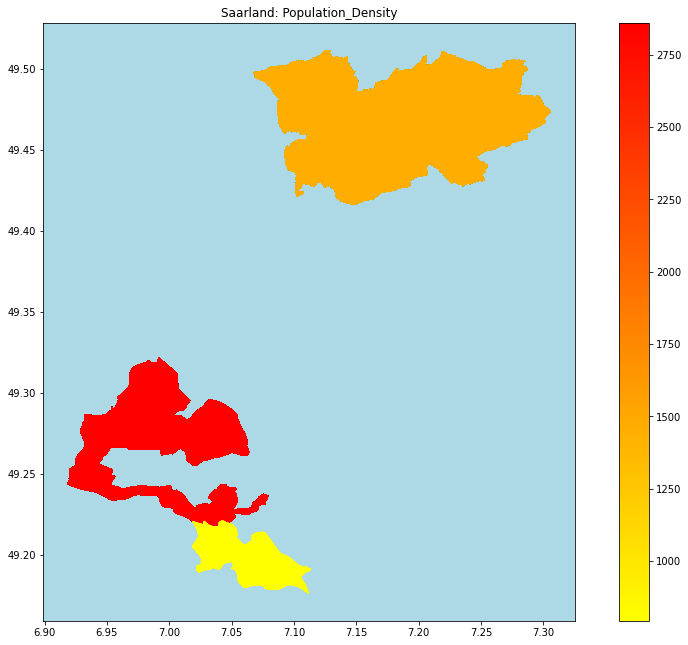

In [124]:
Saarland_df = joindata_withfinal.query('bundesland == "Saarland"')

fig, ax = plt.subplots()

Saarland_df.plot(
    ax=ax, 
    column='Population_Density', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Saarland: Population_Density', 
    aspect=1.3,
    facecolor='lightblue'
);

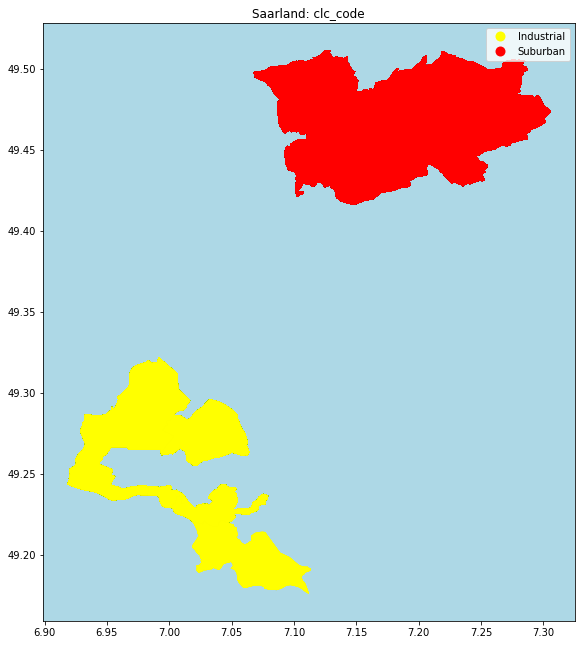

In [125]:
Saarland_df = joindata_withfinal.query('bundesland == "Saarland"')

fig, ax = plt.subplots()

Saarland_df.plot(
    ax=ax, 
    column='clc_code', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Saarland: clc_code', 
    aspect=1.3,
    facecolor='lightblue'
);

# Berlin

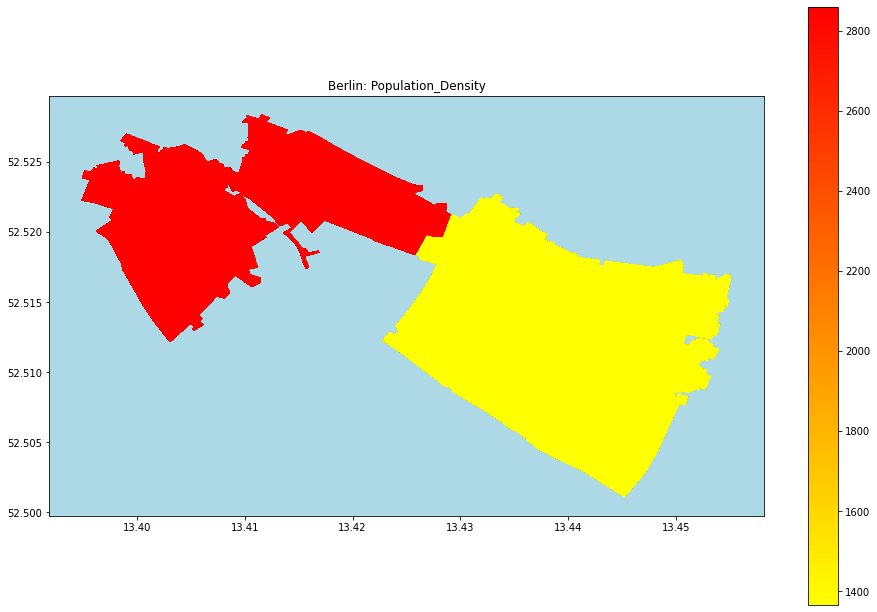

In [126]:
Berlin_df = joindata_withfinal.query('bundesland == "Berlin"')

fig, ax = plt.subplots()

Berlin_df.plot(
    ax=ax, 
    column='Population_Density', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Berlin: Population_Density', 
    aspect=1.3,
    facecolor='lightblue'
);

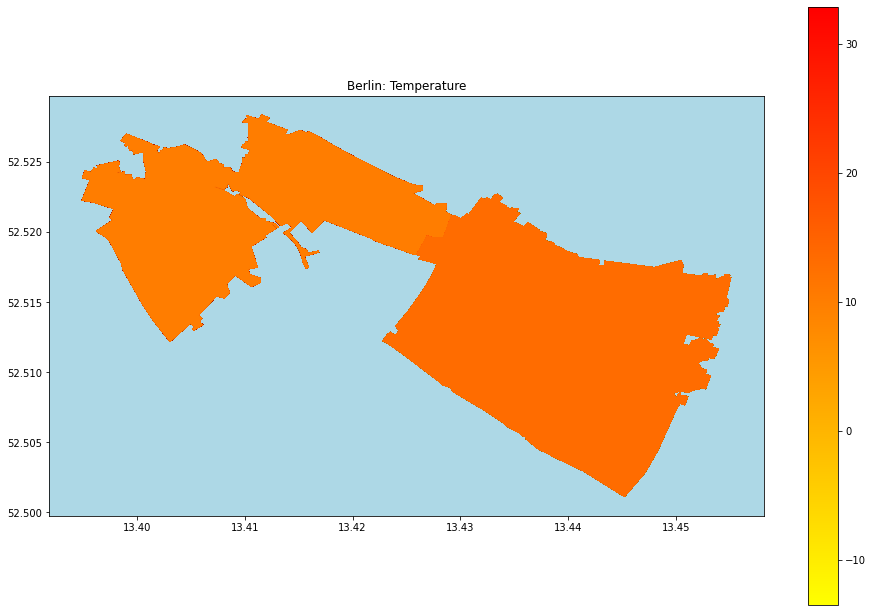

In [127]:
Berlin_df = joindata_withfinal.query('bundesland == "Berlin"')

fig, ax = plt.subplots()

Berlin_df.plot(
    ax=ax, 
    column='Temperature', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Berlin: Temperature', 
    aspect=1.3,
    facecolor='lightblue'
);

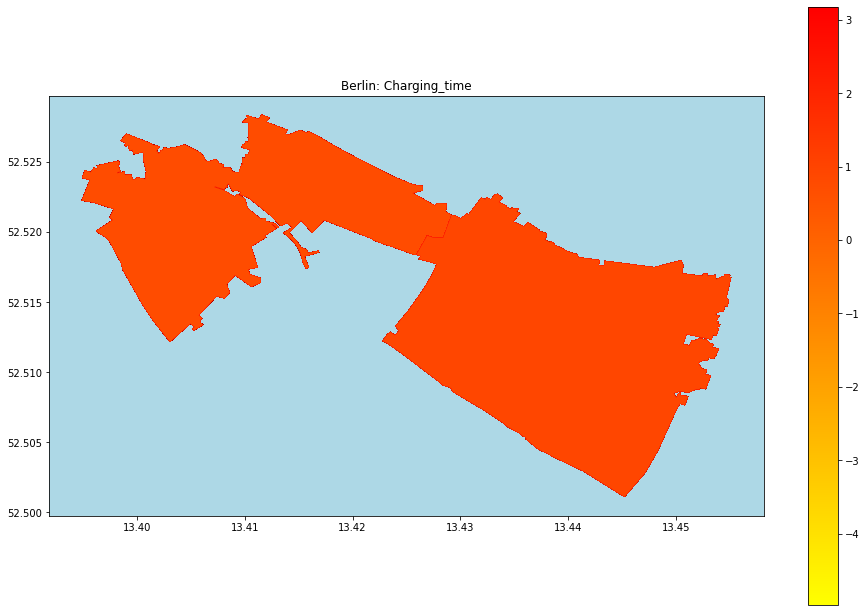

In [128]:
Berlin_df = joindata_withfinal.query('bundesland == "Berlin"')

fig, ax = plt.subplots()

Berlin_df.plot(
    ax=ax, 
    column='Charging_time_in_hours_log', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Berlin: Charging_time', 
    aspect=1.3,
    facecolor='lightblue'
);

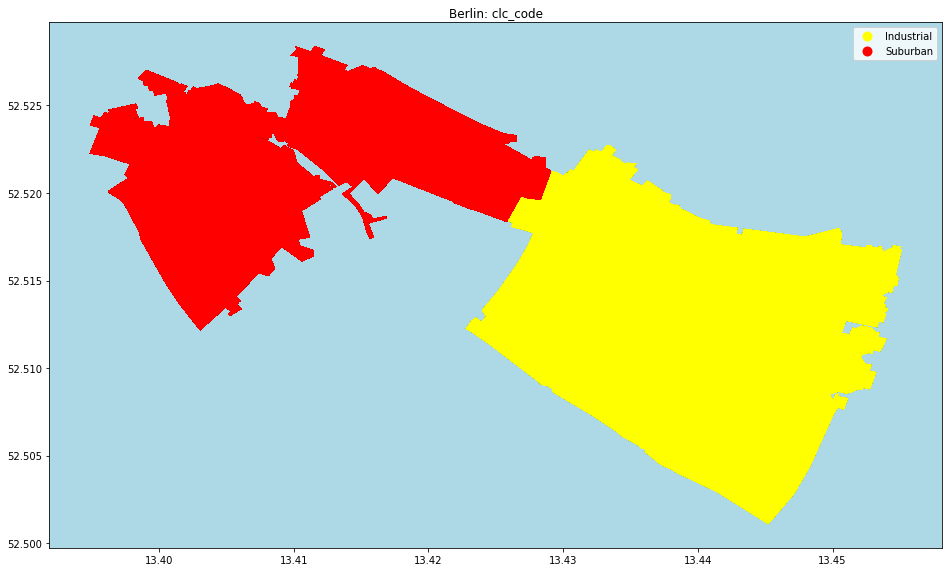

In [129]:
Berlin_df = joindata_withfinal.query('bundesland == "Berlin"')

fig, ax = plt.subplots()

Berlin_df.plot(
    ax=ax, 
    column='clc_code', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Berlin: clc_code', 
    aspect=1.3,
    facecolor='lightblue'
);

# Hamburg

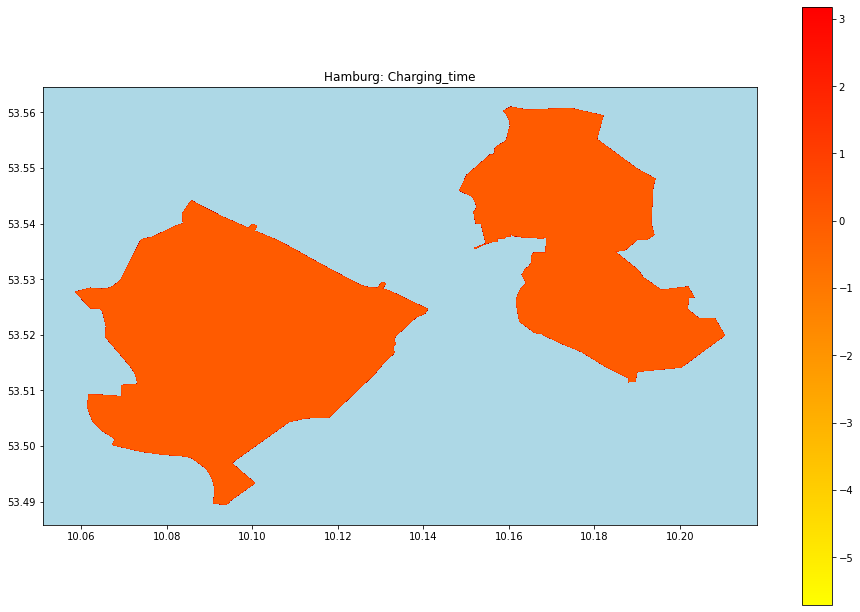

In [130]:
Hamburg_df = joindata_withfinal.query('bundesland == "Hamburg"')

fig, ax = plt.subplots()

Hamburg_df.plot(
    ax=ax, 
    column='Charging_time_in_hours_log', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Hamburg: Charging_time', 
    aspect=1.3,
    facecolor='lightblue'
);


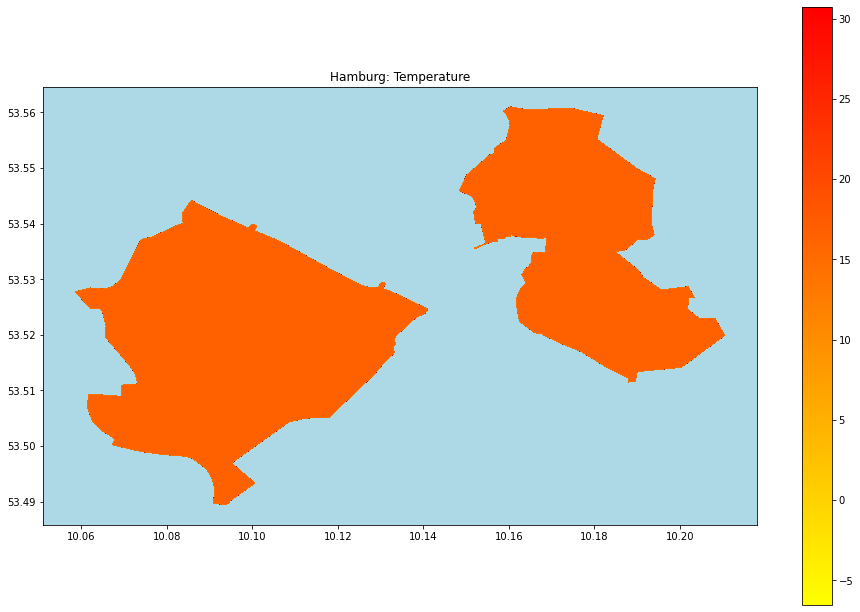

In [131]:
Hamburg_df = joindata_withfinal.query('bundesland == "Hamburg"')

fig, ax = plt.subplots()

Hamburg_df.plot(
    ax=ax, 
    column='Temperature', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Hamburg: Temperature', 
    aspect=1.3,
    facecolor='lightblue'
);


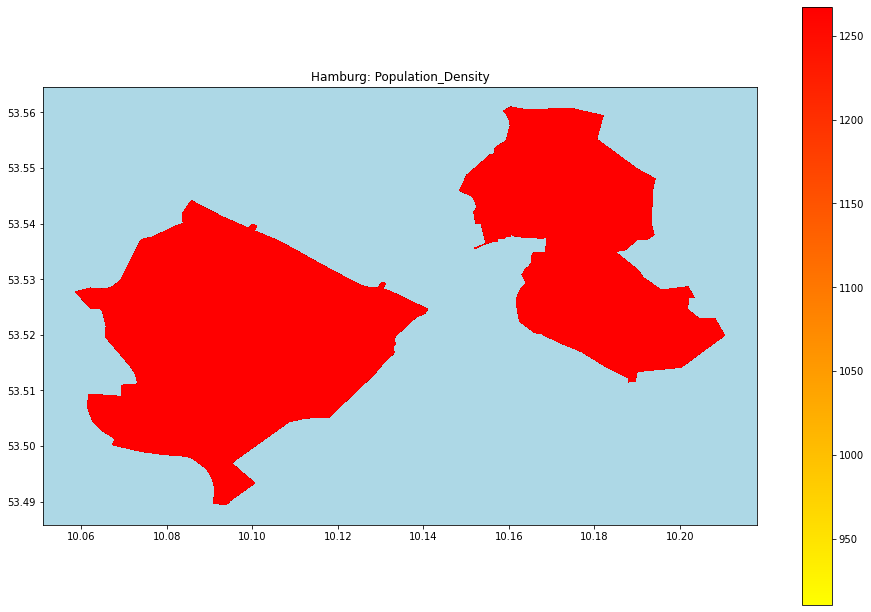

In [132]:
Hamburg_df = joindata_withfinal.query('bundesland == "Hamburg"')

fig, ax = plt.subplots()

Hamburg_df.plot(
    ax=ax, 
    column='Population_Density', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Hamburg: Population_Density', 
    aspect=1.3,
    facecolor='lightblue'
);

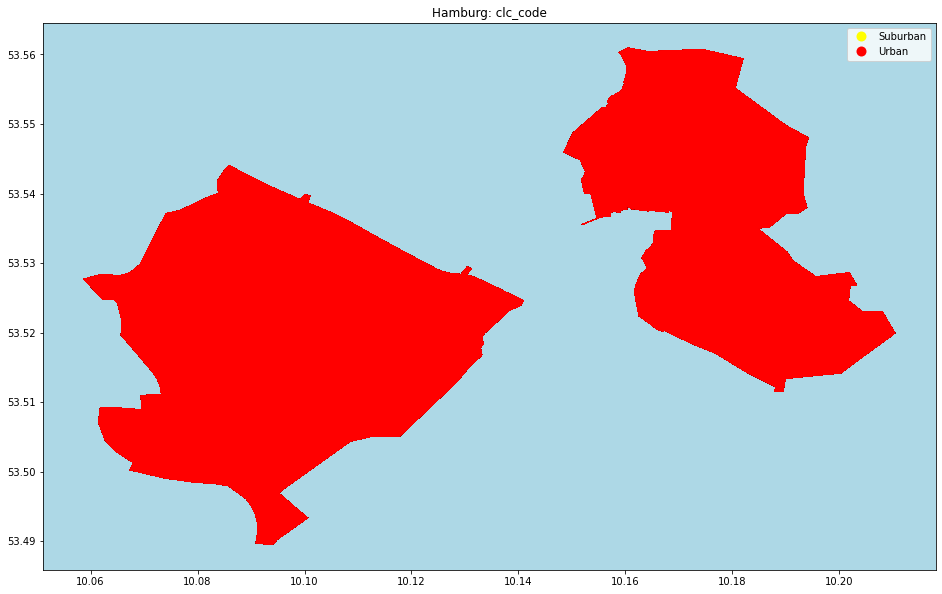

In [133]:
Hamburg_df = joindata_withfinal.query('bundesland == "Hamburg"')

fig, ax = plt.subplots()

Hamburg_df.plot(
    ax=ax, 
    column='clc_code', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Hamburg: clc_code', 
    aspect=1.3,
    facecolor='lightblue'
);

# Sachsen-Anhalt

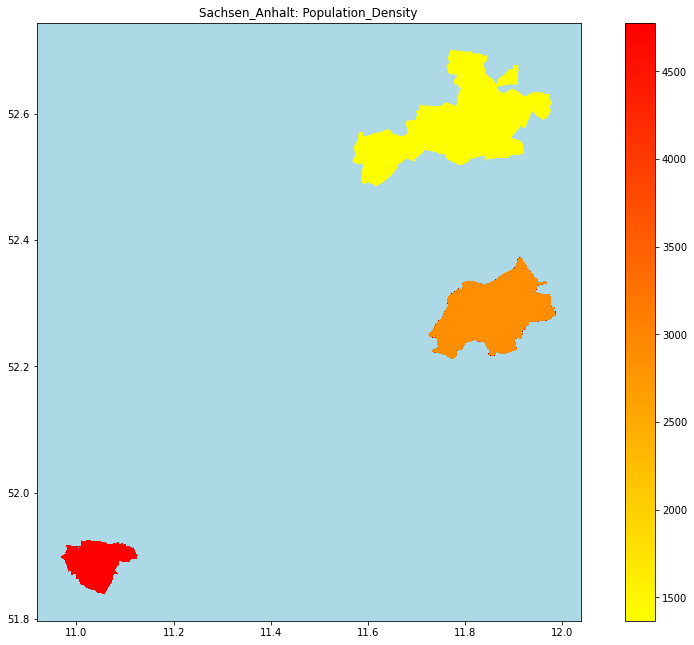

In [134]:
Sachsen_Anhalt_df = joindata_withfinal.query('bundesland == "Sachsen-Anhalt"')

fig, ax = plt.subplots()

Sachsen_Anhalt_df.plot(
    ax=ax, 
    column='Population_Density', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Sachsen_Anhalt: Population_Density', 
    aspect=1.3,
    facecolor='lightblue'
);

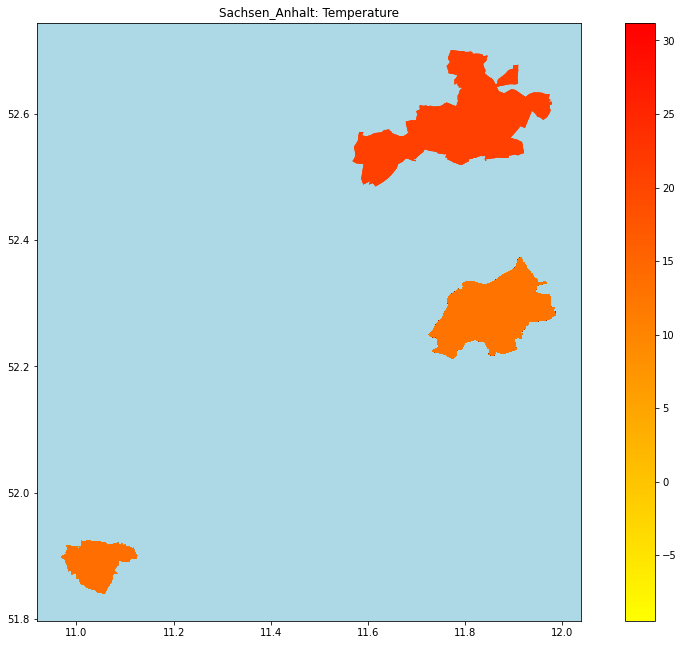

In [135]:
Sachsen_Anhalt_df = joindata_withfinal.query('bundesland == "Sachsen-Anhalt"')

fig, ax = plt.subplots()

Sachsen_Anhalt_df.plot(
    ax=ax, 
    column='Temperature', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Sachsen_Anhalt: Temperature', 
    aspect=1.3,
    facecolor='lightblue'
);

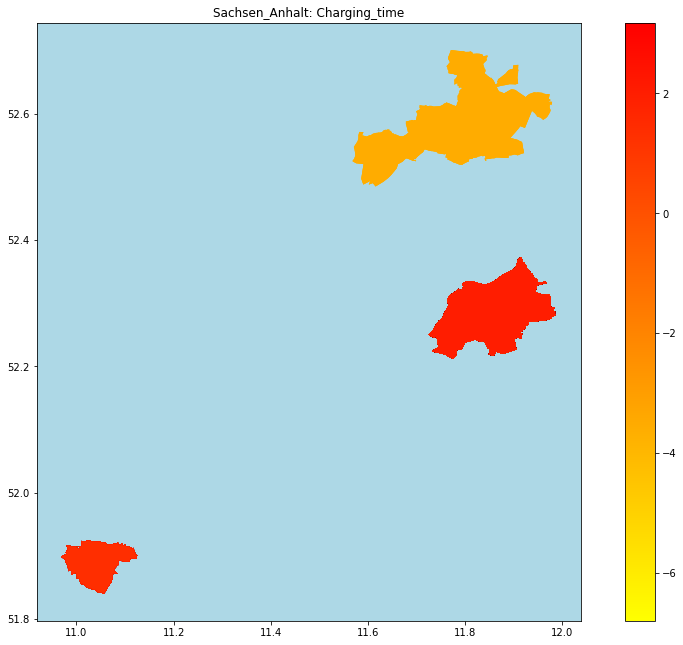

In [136]:
Sachsen_Anhalt_df = joindata_withfinal.query('bundesland == "Sachsen-Anhalt"')

fig, ax = plt.subplots()

Sachsen_Anhalt_df.plot(
    ax=ax, 
    column='Charging_time_in_hours_log', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Sachsen_Anhalt: Charging_time', 
    aspect=1.3,
    facecolor='lightblue'
);

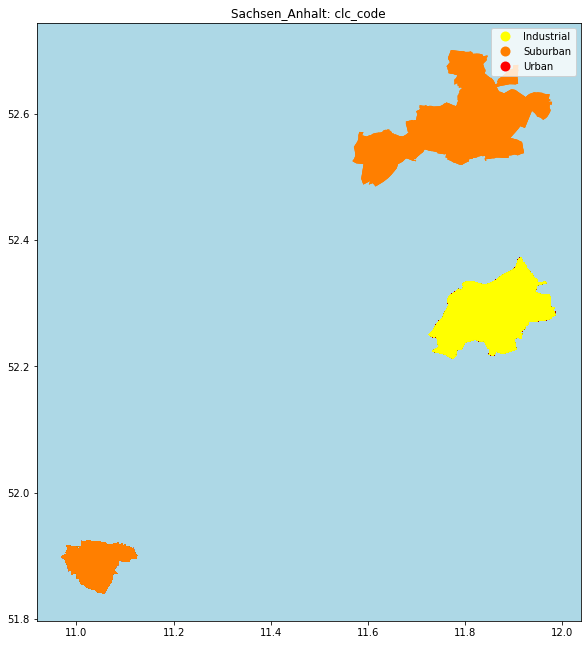

In [137]:
Sachsen_Anhalt_df = joindata_withfinal.query('bundesland == "Sachsen-Anhalt"')

fig, ax = plt.subplots()

Sachsen_Anhalt_df.plot(
    ax=ax, 
    column='clc_code', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Sachsen_Anhalt: clc_code', 
    aspect=1.3,
    facecolor='lightblue'
);

# Main City 

## Munich

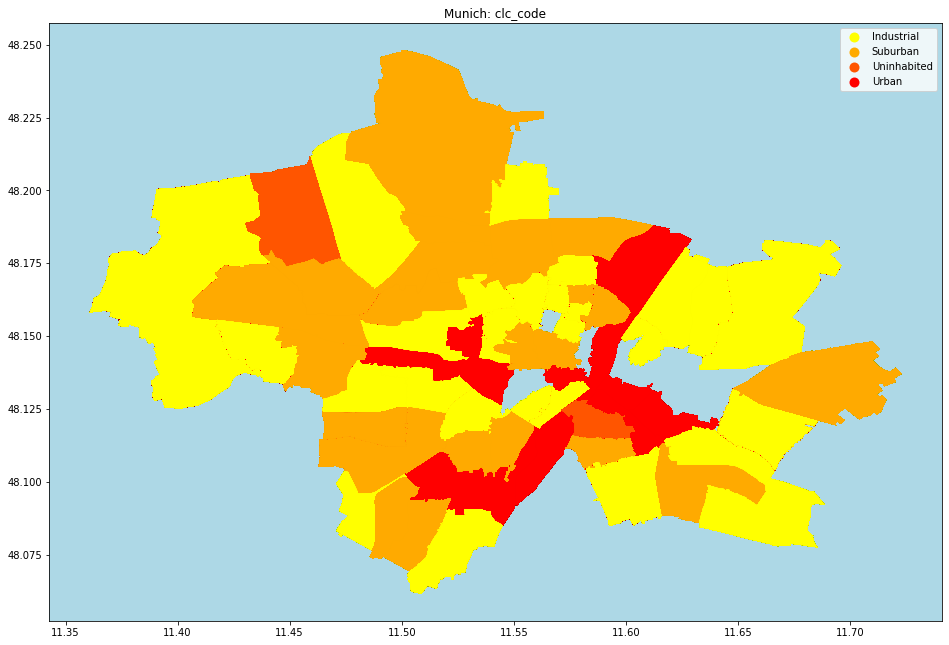

In [138]:
munich_df = joindata_withfinal.query('city == "München"')

fig, ax = plt.subplots()

munich_df.plot(
    ax=ax, 
    column='clc_code', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Munich: clc_code', 
    aspect=1.3, 
    facecolor='lightblue'
);

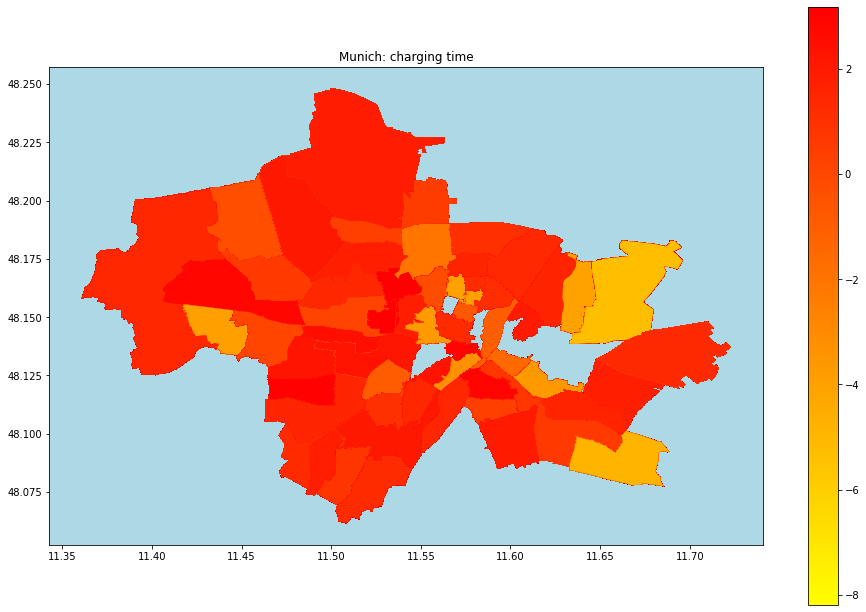

In [139]:
munich_df = joindata_withfinal.query('city == "München"')

fig, ax = plt.subplots()

munich_df.plot(
    ax=ax, 
    column='Charging_time_in_hours_log', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Munich: charging time', 
    aspect=1.3, 
    facecolor='lightblue'
);

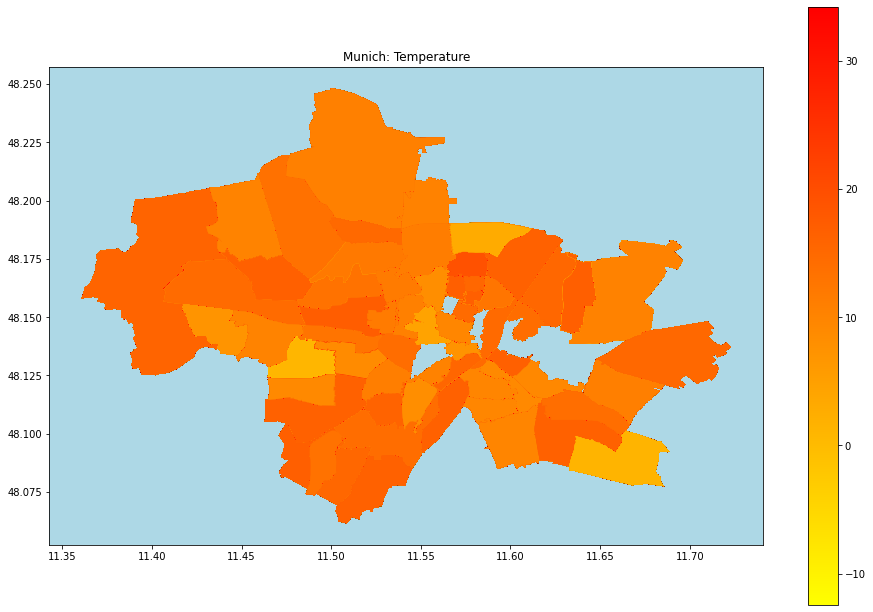

In [140]:
munich_df = joindata_withfinal.query('city == "München"')

fig, ax = plt.subplots()

munich_df.plot(
    ax=ax, 
    column='Temperature', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Munich: Temperature', 
    aspect=1.3, 
    facecolor='lightblue'
);

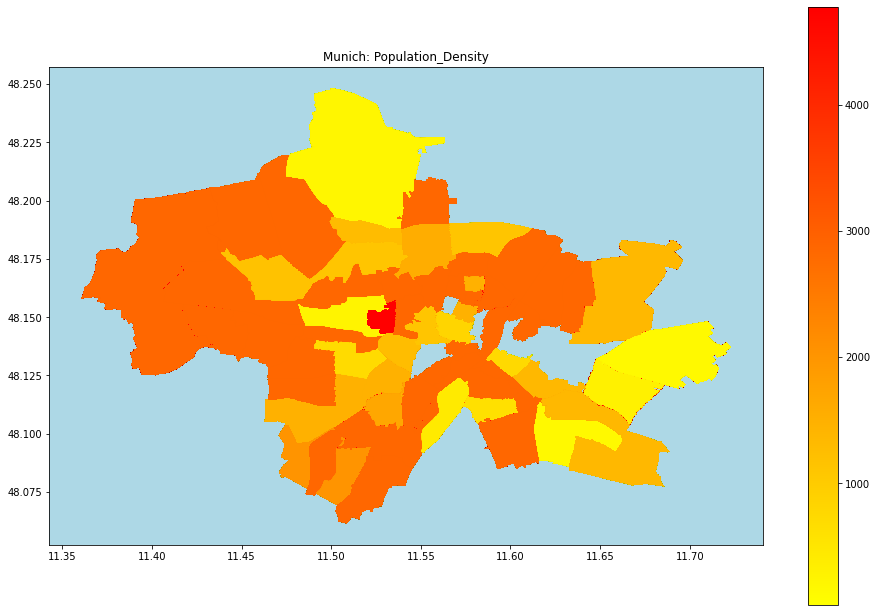

In [141]:
munich_df = joindata_withfinal.query('city == "München"')

fig, ax = plt.subplots()

munich_df.plot(
    ax=ax, 
    column='Population_Density', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Munich: Population_Density', 
    aspect=1.3, 
    facecolor='lightblue'
);

# Dusseldorf

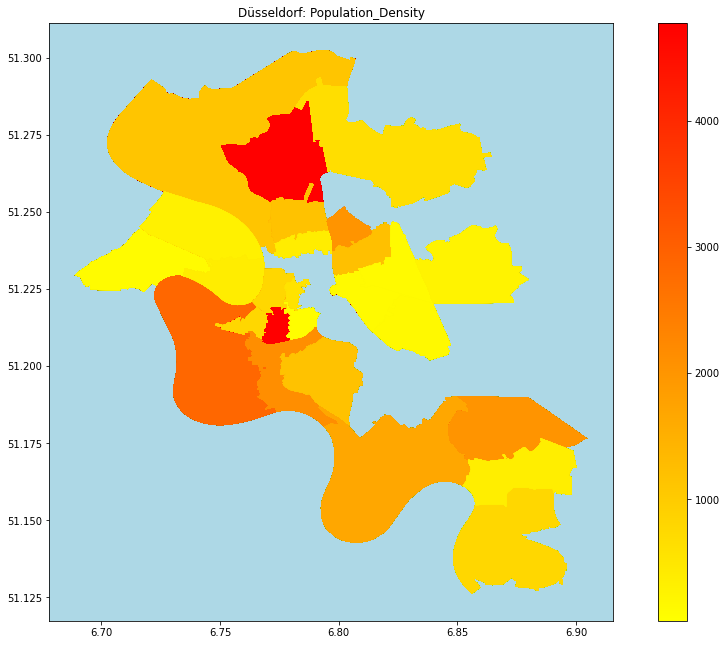

In [142]:
Düsseldorf_df = joindata_withfinal.query('city == "Düsseldorf"')

fig, ax = plt.subplots()

Düsseldorf_df.plot(
    ax=ax, 
    column='Population_Density', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Düsseldorf: Population_Density', 
    aspect=1.3, 
    facecolor='lightblue'
);

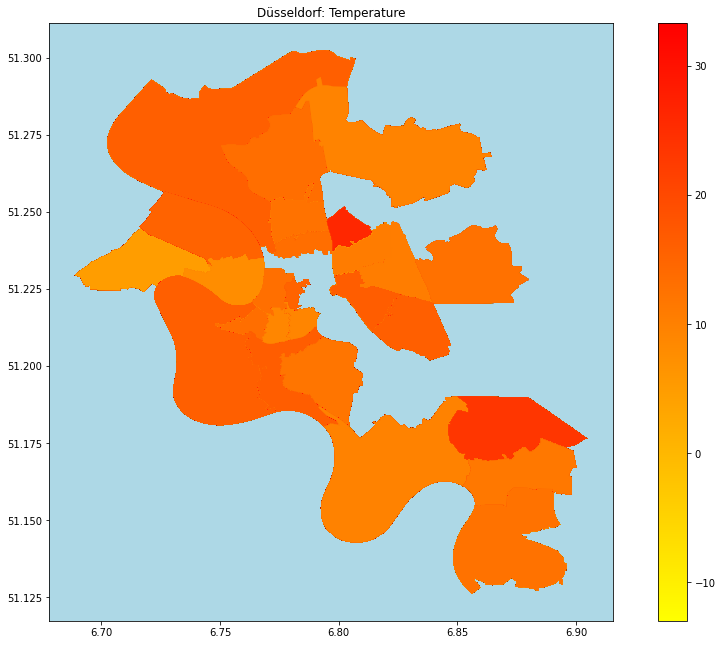

In [143]:
Düsseldorf_df = joindata_withfinal.query('city == "Düsseldorf"')

fig, ax = plt.subplots()

Düsseldorf_df.plot(
    ax=ax, 
    column='Temperature', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Düsseldorf: Temperature', 
    aspect=1.3, 
    facecolor='lightblue'
);

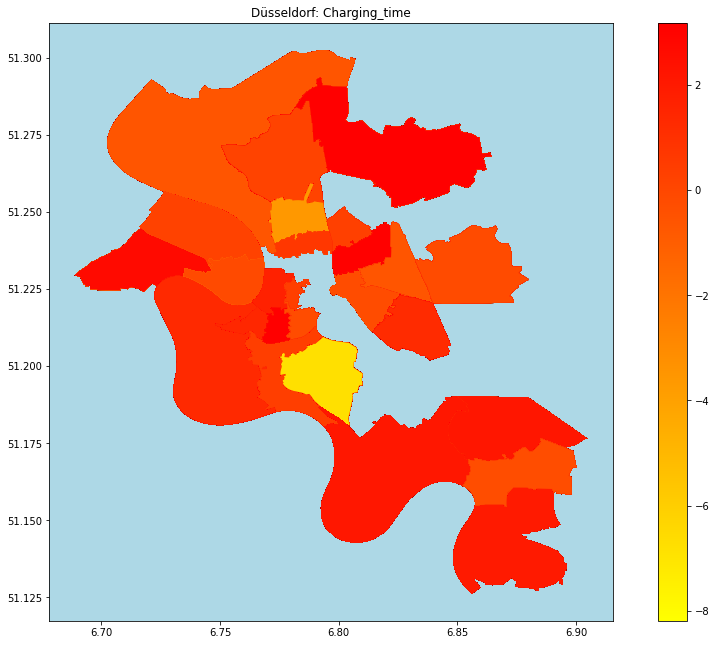

In [144]:
Düsseldorf_df = joindata_withfinal.query('city == "Düsseldorf"')

fig, ax = plt.subplots()

Düsseldorf_df.plot(
    ax=ax, 
    column='Charging_time_in_hours_log', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Düsseldorf: Charging_time', 
    aspect=1.3, 
    facecolor='lightblue'
);

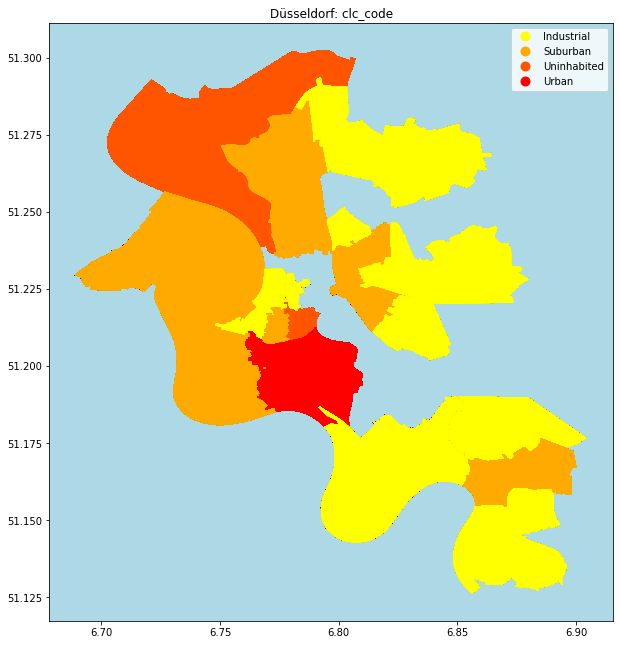

In [145]:
Düsseldorf_df = joindata_withfinal.query('city == "Düsseldorf"')

fig, ax = plt.subplots()

Düsseldorf_df.plot(
    ax=ax, 
    column='clc_code', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Düsseldorf: clc_code', 
    aspect=1.3, 
    facecolor='lightblue'
);

 # köln

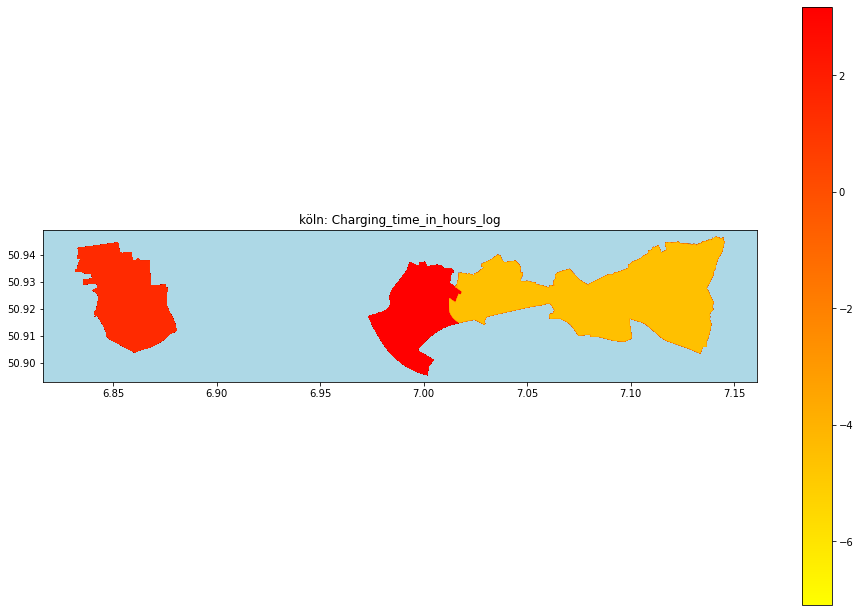

In [146]:
köln_df = joindata_withfinal.query('ort == "Köln"')

fig, ax = plt.subplots()

köln_df.plot(
    ax=ax, 
    column='Charging_time_in_hours_log', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='köln: Charging_time_in_hours_log', 
    aspect=1.3, 
    facecolor='lightblue'
);

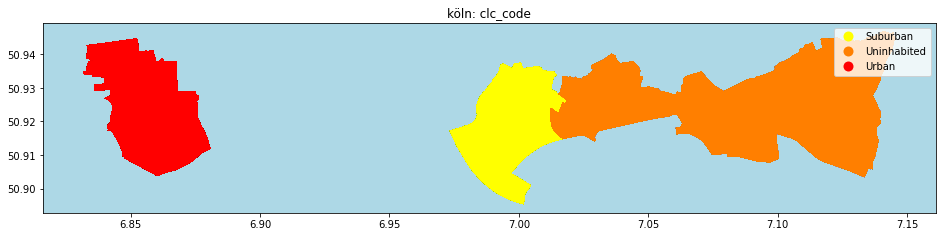

In [147]:
köln_df = joindata_withfinal.query('city == "Köln"')

fig, ax = plt.subplots()

köln_df.plot(
    ax=ax, 
    column='clc_code', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='köln: clc_code', 
    aspect=1.3, 
    facecolor='lightblue'
);

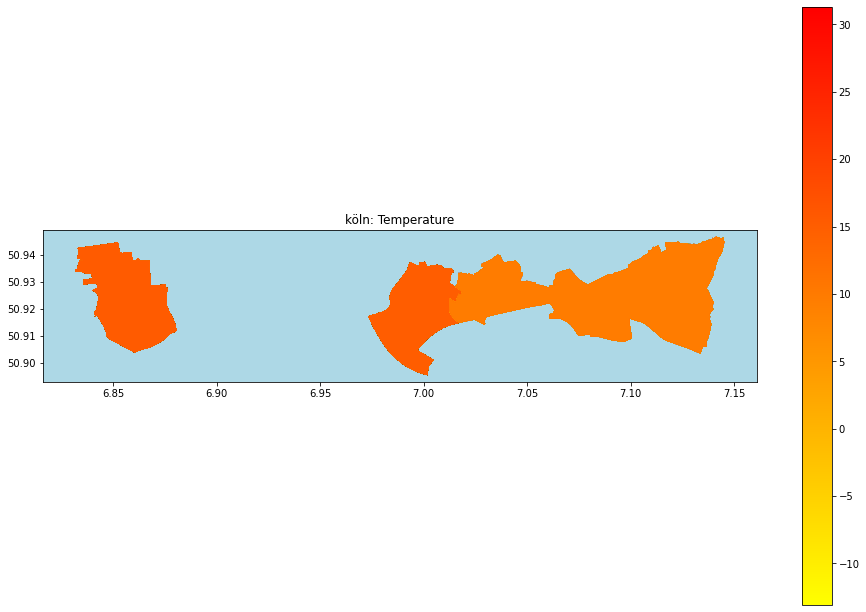

In [148]:
köln_df = joindata_withfinal.query('city == "Köln"')

fig, ax = plt.subplots()

köln_df.plot(
    ax=ax, 
    column='Temperature', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='köln: Temperature', 
    aspect=1.3, 
    facecolor='lightblue'
);

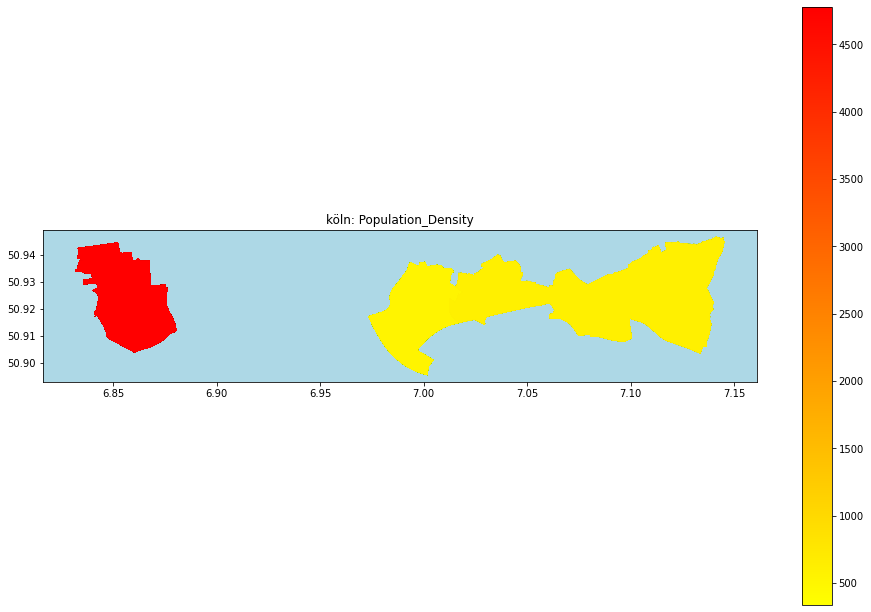

In [149]:
köln_df = joindata_withfinal.query('city == "Köln"')

fig, ax = plt.subplots()

köln_df.plot(
    ax=ax, 
    column='Population_Density', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='köln: Population_Density', 
    aspect=1.3, 
    facecolor='lightblue'
);

# Aachen

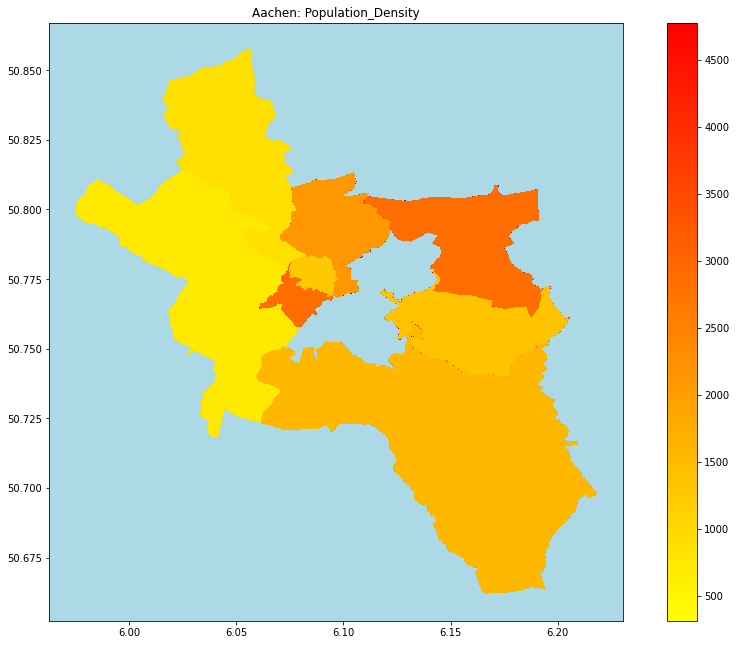

In [150]:
Aachen_df = joindata_withfinal.query('city == "Aachen"')

fig, ax = plt.subplots()

Aachen_df.plot(
    ax=ax, 
    column='Population_Density', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Aachen: Population_Density', 
    aspect=1.3, 
    facecolor='lightblue'
);

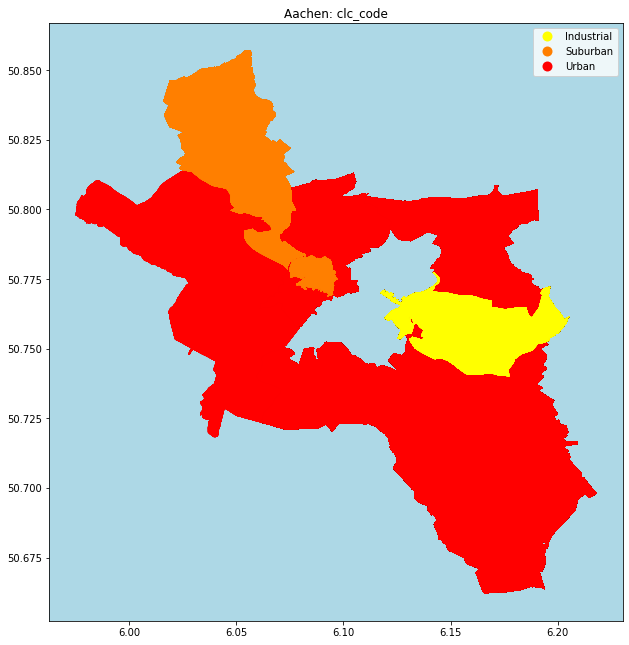

In [151]:
Aachen_df = joindata_withfinal.query('city == "Aachen"')

fig, ax = plt.subplots()

Aachen_df.plot(
    ax=ax, 
    column='clc_code', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Aachen: clc_code', 
    aspect=1.3, 
    facecolor='lightblue'
);

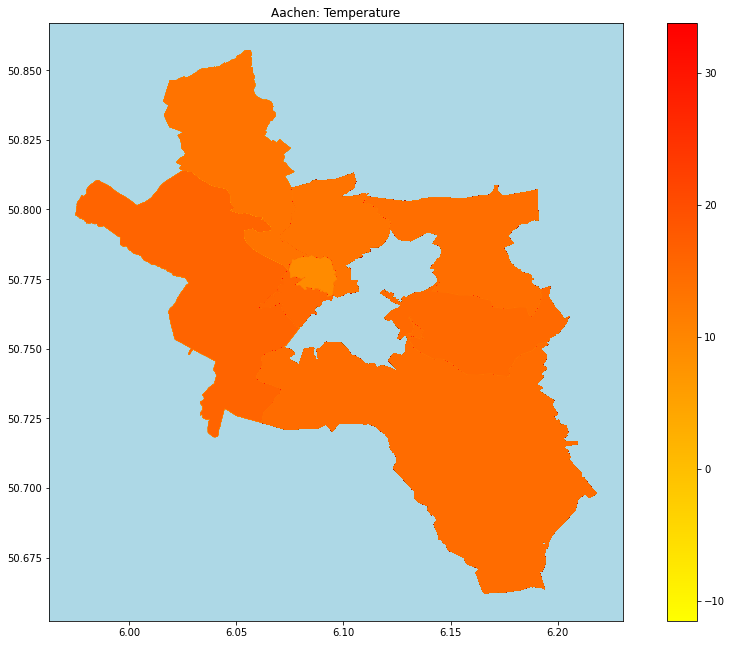

In [152]:
Aachen_df = joindata_withfinal.query('city == "Aachen"')

fig, ax = plt.subplots()

Aachen_df.plot(
    ax=ax, 
    column='Temperature', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Aachen: Temperature', 
    aspect=1.3, 
    facecolor='lightblue'
);

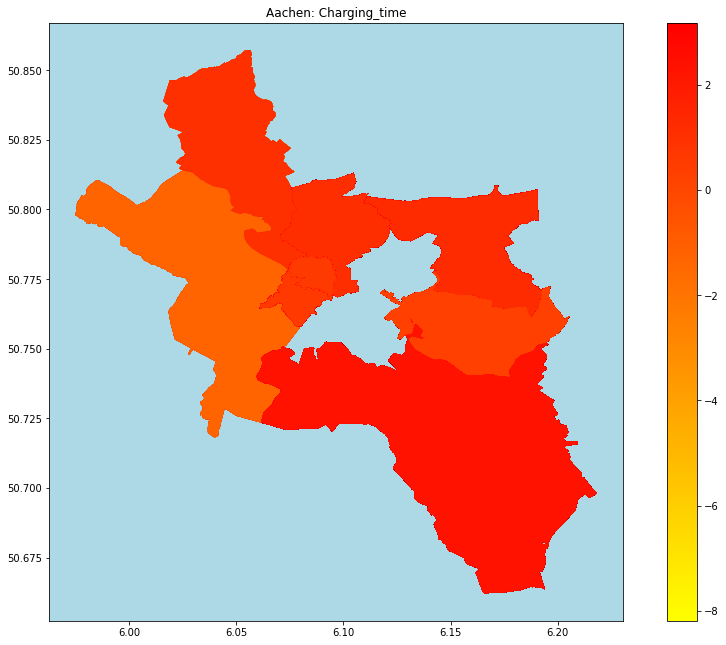

In [153]:
Aachen_df = joindata_withfinal.query('city == "Aachen"')

fig, ax = plt.subplots()

Aachen_df.plot(
    ax=ax, 
    column='Charging_time_in_hours_log', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Aachen: Charging_time', 
    aspect=1.3, 
    facecolor='lightblue'
);

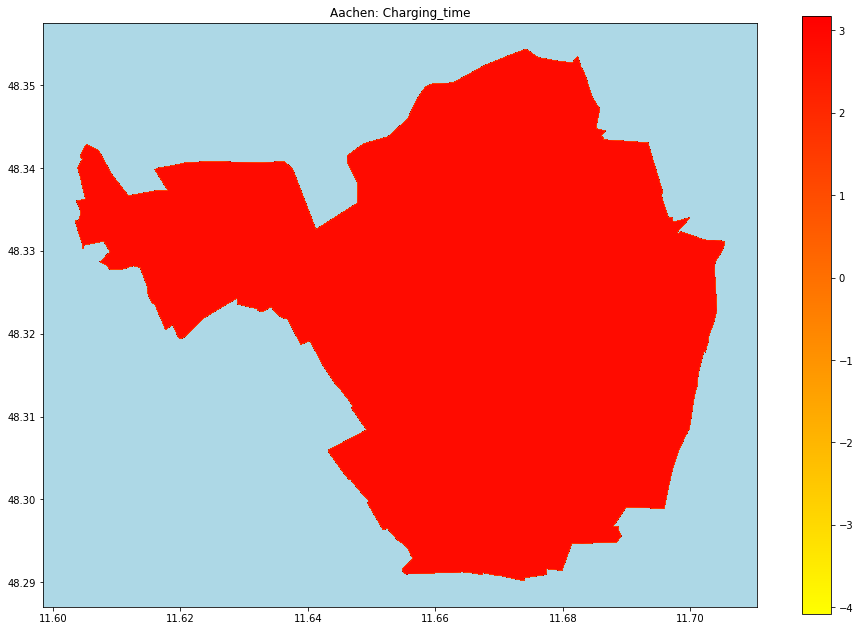

In [154]:
Aachen_df = joindata_withfinal.query('city == "Neufahrn bei Freising"')

fig, ax = plt.subplots()

Aachen_df.plot(
    ax=ax, 
    column='Charging_time_in_hours_log', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Aachen: Charging_time', 
    aspect=1.3, 
    facecolor='lightblue'
);

# ülm

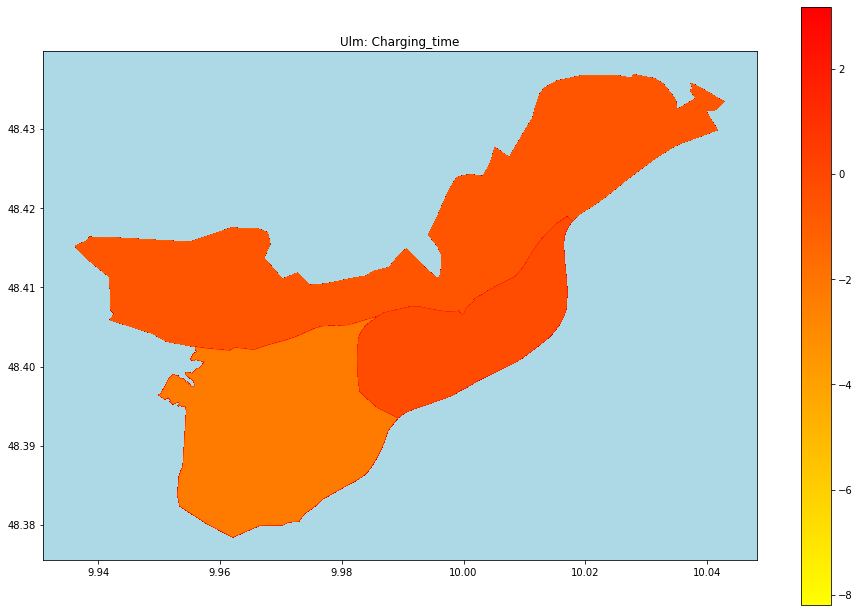

In [155]:
Ulm_df = joindata_withfinal.query('city == "Ulm"')

fig, ax = plt.subplots()

Ulm_df.plot(
    ax=ax, 
    column='Charging_time_in_hours_log', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Ulm: Charging_time', 
    aspect=1.3, 
    facecolor='lightblue'
);

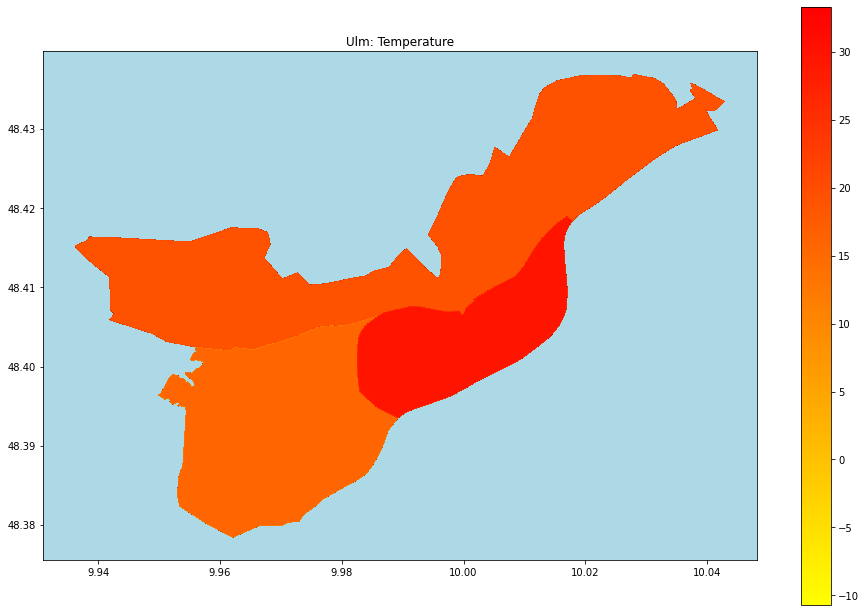

In [156]:
Ulm_df = joindata_withfinal.query('city == "Ulm"')

fig, ax = plt.subplots()

Ulm_df.plot(
    ax=ax, 
    column='Temperature', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Ulm: Temperature', 
    aspect=1.3, 
    facecolor='lightblue'
);

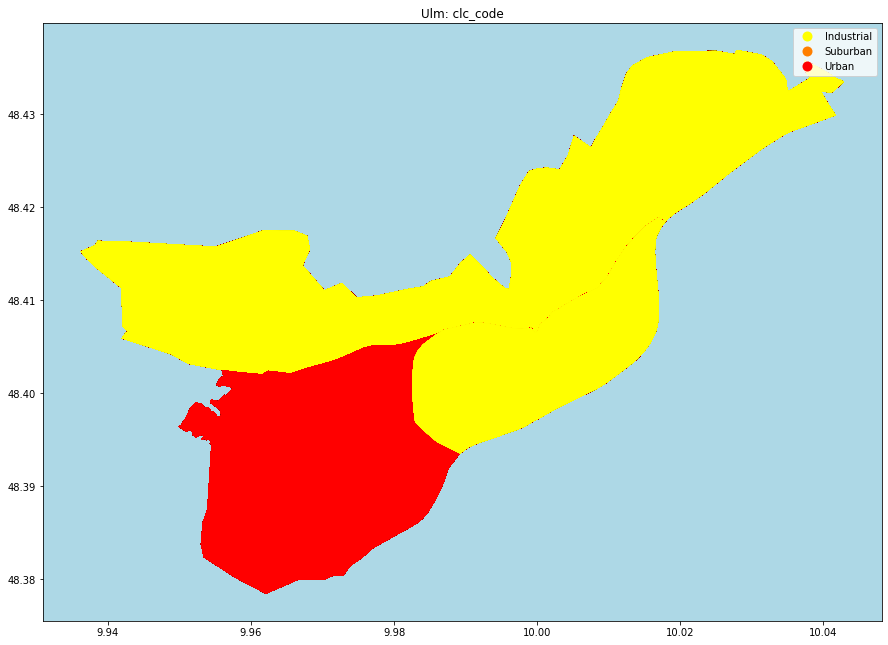

In [157]:
Ulm_df = joindata_withfinal.query('city == "Ulm"')

fig, ax = plt.subplots()

Ulm_df.plot(
    ax=ax, 
    column='clc_code', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Ulm: clc_code', 
    aspect=1.3, 
    facecolor='lightblue'
);

# FRANKFURT

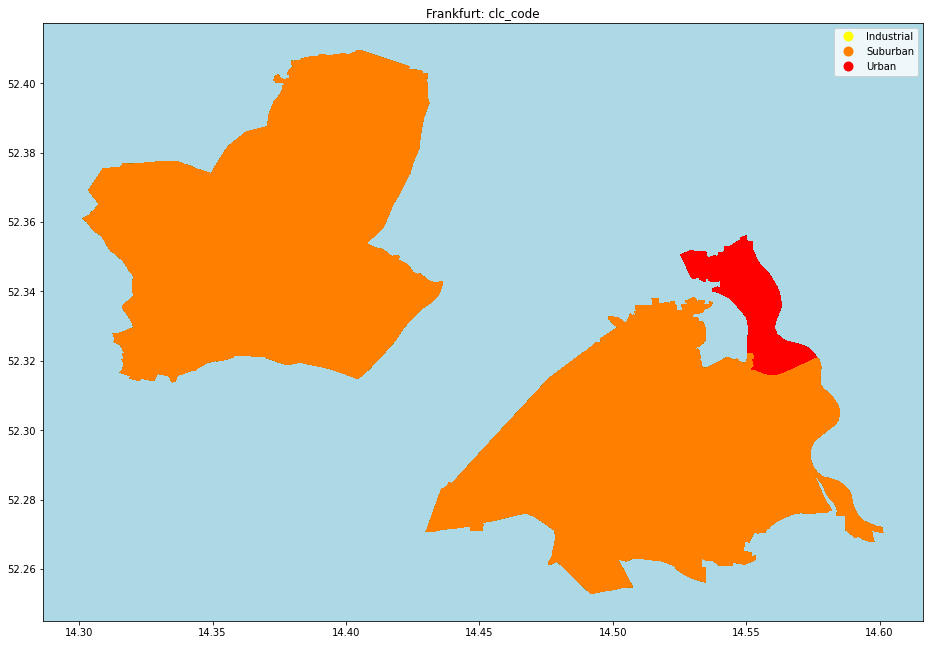

In [158]:
Frankfurt_df = joindata_withfinal.query('city == "Frankfurt (Oder)"')

fig, ax = plt.subplots()

Frankfurt_df.plot(
    ax=ax, 
    column='clc_code', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Frankfurt: clc_code', 
    aspect=1.3, 
    facecolor='lightblue'
);

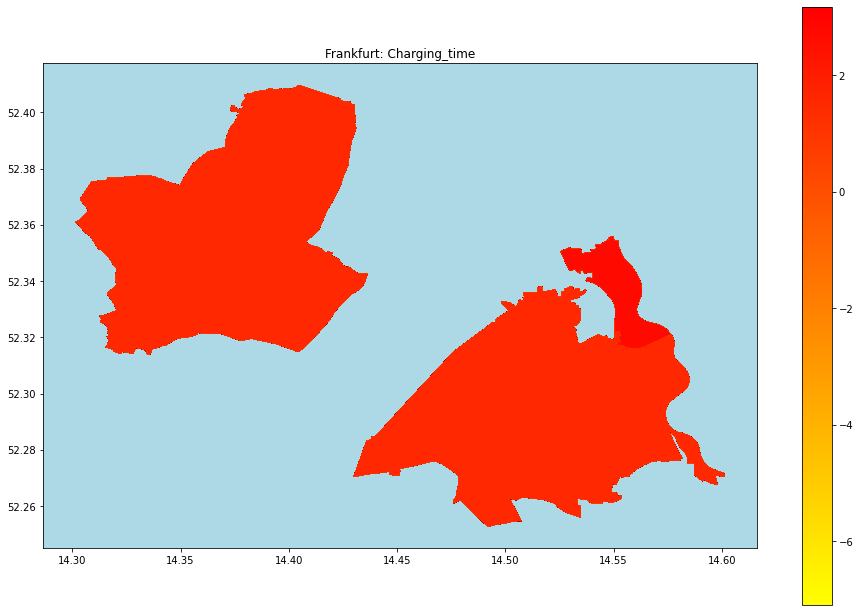

In [159]:
Frankfurt_df = joindata_withfinal.query('city == "Frankfurt (Oder)"')

fig, ax = plt.subplots()

Frankfurt_df.plot(
    ax=ax, 
    column='Charging_time_in_hours_log', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Frankfurt: Charging_time', 
    aspect=1.3, 
    facecolor='lightblue'
);

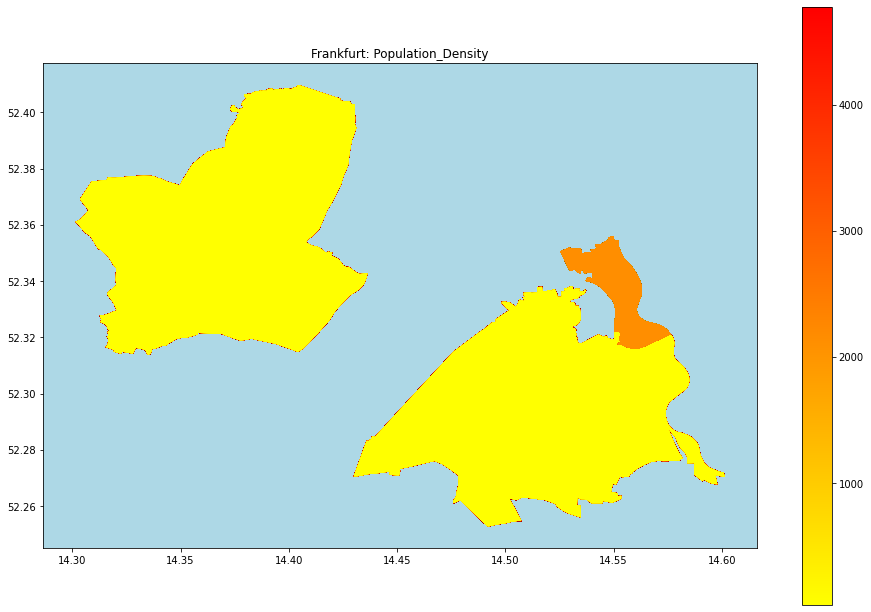

In [160]:
Frankfurt_df = joindata_withfinal.query('city == "Frankfurt (Oder)"')

fig, ax = plt.subplots()

Frankfurt_df.plot(
    ax=ax, 
    column='Population_Density', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Frankfurt: Population_Density', 
    aspect=1.3, 
    facecolor='lightblue'
);

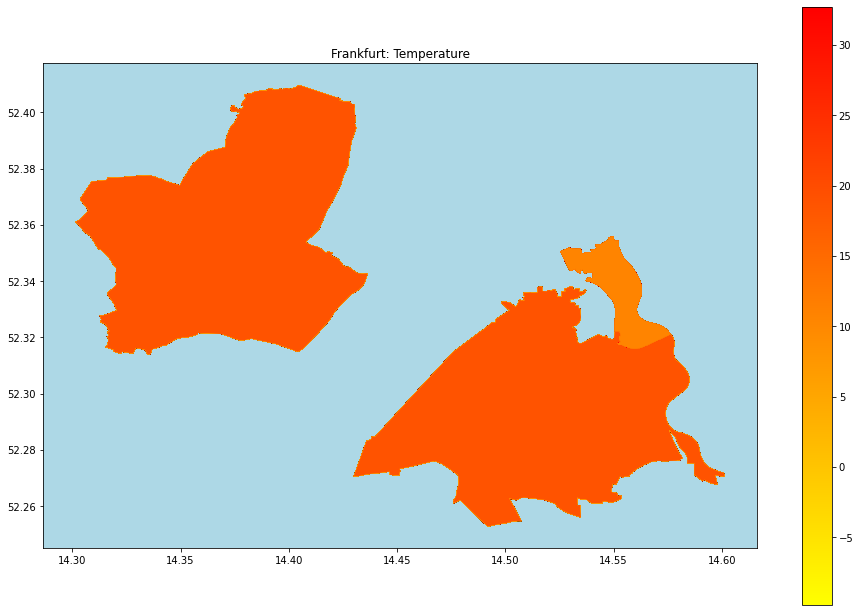

In [161]:
Frankfurt_df = joindata_withfinal.query('city == "Frankfurt (Oder)"')

fig, ax = plt.subplots()

Frankfurt_df.plot(
    ax=ax, 
    column='Temperature', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Frankfurt: Temperature', 
    aspect=1.3, 
    facecolor='lightblue'
);

# osm data

In [54]:
import pandas as pd
osm_df = pd.read_csv("osm.csv")

In [55]:
osm_df.head()

zip_code       id               name  \
0      1067  3278817    Könneritzstraße   
1      1067  3358967       Marienbrücke   
2      1067  3358988       Marienstraße   
3      1067  3358990  Budapester Straße   
4      1067  3497034          Messering   

                                                 tag amenity  bus  \
0  {'cycleway:right': 'no', 'destination:ref': 'B...     NaN  NaN   
1  {'bridge': 'yes', 'change:lanes': 'yes|not_rig...     NaN  NaN   
2  {'bicycle': 'yes', 'foot': 'yes', 'highway': '...     NaN  NaN   
3  {'bicycle:lanes': 'no|no|designated', 'cyclewa...     NaN  NaN   
4  {'highway': 'unclassified', 'lanes': '2', 'lan...     NaN  NaN   

  public_transport  lat  lon  
0              NaN  NaN  NaN  
1              NaN  NaN  NaN  
2              NaN  NaN  NaN  
3              NaN  NaN  NaN  
4              NaN  NaN  NaN

In [56]:
osm_df.amenity.unique()

array([nan, 'restaurant', 'hospital', 'doctors', 'cafe', 'fast_food'],
      dtype=object)

In [61]:
def osm_(a="restaurant"):
    return osm_df[osm_df["amenity"]==a].groupby(["zip_code"]).count().reset_index()[["zip_code","amenity"]].rename(columns=
                                                                                                                  {"amenity":"Num_"+a,"zip_code":"plz"})
    


In [62]:
osm = osm_(a="restaurant")
for i in ['hospital', 'doctors', 'cafe', 'fast_food']:
    osm = pd.merge(osm,osm_(a=i))

In [64]:
osm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1373 entries, 0 to 1372
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   plz             1373 non-null   int64
 1   Num_restaurant  1373 non-null   int64
 2   Num_hospital    1373 non-null   int64
 3   Num_doctors     1373 non-null   int64
 4   Num_cafe        1373 non-null   int64
 5   Num_fast_food   1373 non-null   int64
dtypes: int64(6)
memory usage: 75.1 KB


In [68]:
joindata_withfinal = joindata_withfinal.astype({"plz": int})

In [72]:
joindata_withfinal = pd.merge(joindata_withfinal,osm,how="outer")

In [74]:
joindata_withfinal.isna().sum()/len(joindata_withfinal)

plz                           0.000000
geometry                      0.000576
first_dig_plz                 0.000576
ort                           0.000576
bundesland                    0.000576
einwohner                     0.000576
evse_id                       0.000576
datetime_start                0.000576
datetime_stop                 0.000576
city                          0.000576
park_id                       0.000576
latitude                      0.000576
longitude                     0.000576
year                          0.000576
month                         0.000576
day                           0.000576
day_of_week_name_Start        0.000576
Temperature                   0.000576
Precipitation                 0.000576
clc_code                      0.000576
area_code                     0.000576
Population_Density            0.000576
Count_Charging                0.000576
Charging_time_in_hours_log    0.000576
Charging_time_in_min_log      0.000576
Num_restaurant           

In [21]:
osm_(a="restaurant")

zip_code  Num_restaurant
0         1067             118
1         1069              28
2         1097              40
3         1099              83
4         1108               7
...        ...             ...
7303     99988               4
7304     99991               5
7305     99994               7
7306     99996               2
7307     99998               6

[7308 rows x 2 columns]

In [19]:
osm_df[osm_df["amenity"]=="restaurant"].groupby(["zip_code"]).count().reset_index()[["zip_code","amenity"]].rename(columns=
                                                                                                                  {"amenity":"Num_Rest"})

zip_code  Num_Rest
0         1067       118
1         1069        28
2         1097        40
3         1099        83
4         1108         7
...        ...       ...
7303     99988         4
7304     99991         5
7305     99994         7
7306     99996         2
7307     99998         6

[7308 rows x 2 columns]

In [317]:
from geopy import Nominatim

locator = Nominatim(user_agent='myGeocoder')

location = locator.geocode('Humboldt Universität zu Berlin')

print(location)

Humboldt-Universität zu Berlin, Lentzeallee, Schmargendorf, Charlottenburg-Wilmersdorf, Berlin, Deutschland


In [318]:
def lat_lng_from_string_loc(x):
    
    locator = Nominatim(user_agent='myGeocoder')

    location = locator.geocode(x)
    
    if location is None:
        None
    else:
        return location.longitude, location.latitude

In [319]:
berlin_locations = [
    'Alexander Platz', 
    'Zoo Berlin', 
    'Berlin Tegel', 
    'Berlin Schönefeld',
    'Berlin Adlershof',
    'Olympia Stadium Berlin',
    'Berlin Südkreuz', 
    'Frei Universität Berlin',
    'Mauerpark', 
    'Treptower Park',
]

# Get geodata.
berlin_locations_geo = {
    x: lat_lng_from_string_loc(x) 
    for x in berlin_locations 
}

# Remove None.
berlin_locations_geo = {
    k: v 
    for k, v in berlin_locations_geo.items()
    if v is not None
}

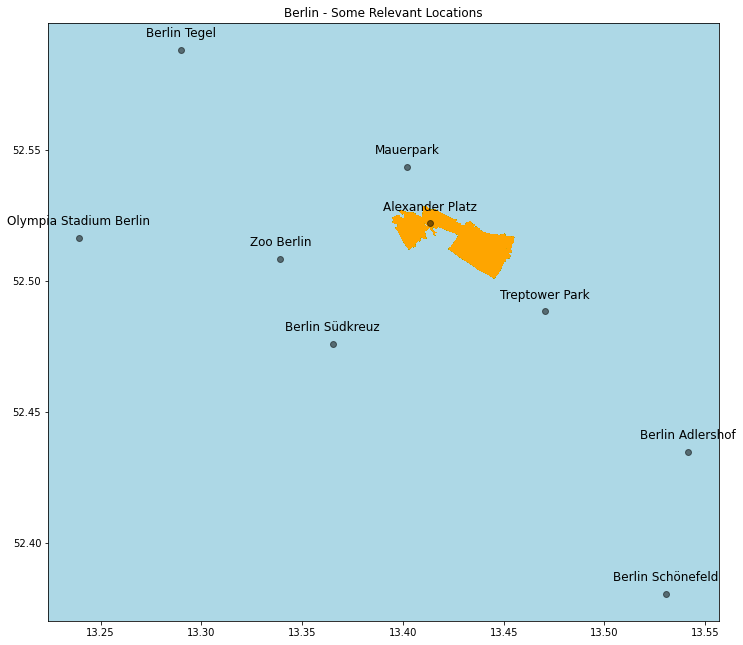

In [322]:
berlin_locations_geo = {
    x: lat_lng_from_string_loc(x) 
    for x in berlin_locations 
}

# Remove None.
berlin_locations_geo = {
    k: v 
    for k, v in berlin_locations_geo.items()
    if v is not None
}

#Let us see the resulting map:

berlin_df = joindata_withfinal.query('ort == "Berlin"')

fig, ax = plt.subplots()

berlin_df.plot(
    ax=ax, 
    color='orange', 
    alpha=0.8
)

for c in berlin_locations_geo.keys():

    ax.text(
        x=berlin_locations_geo[c][0], 
        y=berlin_locations_geo[c][1] + 0.005, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        berlin_locations_geo[c][0], 
        berlin_locations_geo[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Berlin - Some Relevant Locations', 
    aspect=1.3,
    facecolor='lightblue'
);

